In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from datetime import datetime
import random

#import csv file as dataframe
data=pd.read_csv(r"C:\Users\Start Kasemeier\Desktop\Machine_Learning\Python_notebooks\Master_thesis_analysis\surveydata_ML_external_data.csv")
#inspect data
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Start Kasemeier\\Desktop\\Machine_Learning\\Python_notebooks\\Master_thesis_analysis\\surveydata_ML_external_data.csv'

In [52]:
for i in data.columns:
    print(i)

ID
Start
Datum und Zeit
1. Are you using external data sources for the training of Machine Learning models?
2. Are you currently working for a company that deploys Machine Learning in any organizational unit?
3. Are you working with Machine Learning outside of a company?
4. Can the models you are training be used in a specific industrial or organizational context?
Country
Accounting
Airlines/Aviation
Alternative Dispute Resolution
Alternative Medicine
Animation
Apparel &amp; Fashion
Architecture &amp; Planning
Arts and Crafts
Automotive
Aviation &amp; Aerospace
Banking
Biotechnology
Broadcast Media
Building Materials
Business Supplies and Equipment
Capital Markets
Chemicals
Civic &amp; Social Organization
Civil Engineering
Commercial Real Estate
Computer &amp; Network Security
Computer Games
Computer Hardware
Computer Networking
Computer Software
Construction
Consumer Electronics
Consumer Goods
Consumer Services
Cosmetics
Dairy
Defense &amp; Space
Design
Education Management
E-Learning

In [1]:
#caclulate average participation time of those who answered "all" questions
#calculate the time in minutes each participant spent on the survey
part_dur=[]
for i in data.index:
    d2 = datetime.strptime(data["Start"][i], "%d.%m.%Y %H:%M")
    d1 = datetime.strptime(data["Datum und Zeit"][i], "%d.%m.%Y %H:%M")
    diff=d1-d2
    part_dur.append(diff.seconds/60)

#create new column for time spent "time spent" in data
data["time spent (in mins)"]=part_dur

#inspect data and remove outliers 
fig = plt.figure(tight_layout=True)
gs = gridspec.GridSpec(1, 3)
ax = fig.add_subplot(gs[0,0])
ax.boxplot(data["time spent (in mins)"])
ax.set_title("First inspection")
ax.set_ylabel("participation duration (in mins)")
ax = fig.add_subplot(gs[0,1])
ax.boxplot(data[data["time spent (in mins)"]<800]["time spent (in mins)"])
ax.set_title("Second inspection,\n drop outliers>800")
ax = fig.add_subplot(gs[0,2])
ax.boxplot(data[data["time spent (in mins)"]<33]["time spent (in mins)"]) 
ax.set_title("Second inspection,\n drop outliers>33")
plt.show()

#Calculate the average time spent to answer full survey, without outliers
#someone who answered Question 29, participated throughout the whole survey
fullparticipation=data['29. Which external sources for data are you currently using to train Machine Learning models?'].dropna().index.tolist()
no_outliers=data.loc[fullparticipation,:]["time spent (in mins)"]<33
avg_time=(data.loc[fullparticipation,"time spent (in mins)"][no_outliers].sum())/(len(data.loc[fullparticipation,"time spent (in mins)"][no_outliers]))
print("The average time for completing the survey in one of the foreseen paths is", round(avg_time,3), "minutes.")

NameError: name 'data' is not defined

In [54]:
#create sub-dataframes for each question and name them Q...
#Q1 - Extent of external data usage
Q1=data["1. Are you using external data sources for the training of Machine Learning models?"]

#Q2 - Company context
Q2=data["2. Are you currently working for a company that deploys Machine Learning in any organizational unit?"]

#Q3 - Out of company context
Q3=data["3. Are you working with Machine Learning outside of a company?"]

#Q4 - Outside of company but industry-affiliation
Q4=data["4. Can the models you are training be used in a specific industrial or organizational context?"]

#Q5&10 - Industry & industry group affiliation
Q5and10=data.loc[:,"Accounting":"Writing and Editing"]
ind_group=data.loc[:,"Art":"Transportation"]

#Q6&12 - Value chain application area
Q6and12=data.loc[:,"Inbound logistics":"Finances & controlling"]

#Q7&9 - Country
Q7and9=data["Country"]

#Q8 - Company size
Q8=data["8. How many people are employed at the company you are working at?"]

#Q11 - Job title
Q11=data["11. What is your job title?"]

#Q13 - Use of selection criteria
Q13=data["13. Are you choosing external data according to selection criteria?"]

#Q14 - Data selection criteria
Q14=data.loc[:,"Machine readibility":"Textfeld"]

#Q15 - Alternative data selection
Q15=data["15. How are you choosing your external data sources?"]

#Q16 - Knowledge about data structure
Q16=data["16. Do you know whether your models are trained on structured or unstructured data or even a mix between the two?"]

#Q17 - Data structure
Q17=data["17. Please estimate the distribution between structured and unstructured data sources you are using for the training of Machine Learning models"]

#Q18 - Knowledge about file formats
Q18=data["18. Are there certain file formats that you prefer or refrain from using?"]

#Q19 - Preferred formats
Q19=data["19. Which file formats do you prefer?"]

#Q20 - Refrained from formats
Q20=data["20. Which file formats do you refrain from using?"]

#Q21 - Data providers
Q21=data.loc[:,"government agencies (incl. universities)":"Textfeld.1"]

#Q22 - Data accessibility
Q22=data.loc[:,"Public access (open data)":"Textfeld.2"]

#Q23 - Data types
Q23=data.loc[:,"personal data (e.g., address, medical details, transactions, communications, etc.)":"Client's information"]

#Q24 - Statements on external data
Q24=data.loc[:,"It is possible to derive a practical benefit from Machine Learning models which are trained explicitly on external data.":"Model training on purely external data suits educational purposes."]

#Q25 - Knowledge about model complexity
Q25=data["25. Do you know whether you are training models based on traditional Machine Learning or Deep Learning?"]

#Q26 - Model complexity
Q26=data["26. Which model complexity do you use most often?"]

#Q27 - Model building process
Q27=data.loc[:,"Non-automated frameworks (e.g. scikit-learn, Keras or TensorFlow in Python)":"Textfeld.3"]

#Q28 - Learning methods
Q28=data["28. Which learning technique do you use most often?"]

#Q29 - External data sources
Q29=data["29. Which external sources for data are you currently using to train Machine Learning models?"]

#Q30 - Dummy question
Q30=data["30. This is the last question before the end of the questionnaire. Are you sure you are done and want to submit the survey?"]

In [90]:
#create all possible filters that may be applied to the results of each question
filters=[]
filternames=[]
#extent of external data usage
filter_only=Q1=="Yes, as stand-alone training data"
filter_mix=Q1=="Yes, sometimes as enrichment and sometimes as stand-alone training data"
filter_enrich=Q1=="Yes, as enrichment of our internal data"
filters.append(filter_only)
filters.append(filter_mix)
filters.append(filter_enrich)
filternames.append("Purely external data for training")
filternames.append("External data purely or as enrichment")
filternames.append("External data as enrichment")

#in-company use vs outside-of-company use
filter_incompany=Q2=="Yes"
filter_outcompany=Q4=="Yes"
filters.append(filter_incompany)
filters.append(filter_outcompany)
filternames.append("Development inside of company")
filternames.append("Development outside of company")

#get the filters for large vs small companies
filter_small=Q8.isin(["less than 10","between 10 and 50","between 50 and 250"])
filter_large=Q8.isin(["between 250 and 500","between 500 and 1000","more than 1000"])
filters.append(filter_small)
filters.append(filter_large)
filternames.append("Companies with up to 250 employees")
filternames.append("Companies with more than 250 employees")

#get the filters for the different industries
filter_art=data["Art"]==1
filter_cons=data["Construction"]==1
filter_corp=data["Corporate"]==1
filter_edu=data["Education"]==1
filter_fin=data["Finance"]==1
filter_good=data["Goods"]==1
filter_gov=data['Government']==1
filter_hlth=data["Healthcare"]==1
filter_leg=data["Legal"]==1
filter_man=data["Manufacturing"]==1
filter_med=data["Media & entertainment"]==1
filter_org=data["Organization"]==1
filter_rec=data["Recreation"]==1
filter_serv=data["Service"]==1
filter_tech=data["Technology"]==1
filter_tran=data["Transportation"]==1
filters.append(filter_art)
filters.append(filter_cons)
filters.append(filter_corp)
filters.append(filter_edu)
filters.append(filter_fin)
filters.append(filter_good)
filters.append(filter_gov)
filters.append(filter_hlth)
filters.append(filter_leg)
filters.append(filter_man)
filters.append(filter_med)
filters.append(filter_org)
filters.append(filter_rec)
filters.append(filter_serv)
filters.append(filter_tech)
filters.append(filter_tran)
filternames.append("Art")
filternames.append("Construction")
filternames.append("Corporate")
filternames.append("Education")
filternames.append("Finance")
filternames.append("Goods")
filternames.append('Government')
filternames.append("Healthcare")
filternames.append("Legal")
filternames.append("Manufacturing")
filternames.append("Media & entertainment")
filternames.append("Organization")
filternames.append("Recreation")
filternames.append("Service (industry group)")
filternames.append("Technology")
filternames.append("Transportation")

#get the filters for the different application areas
filter_inboundlogistics=data["Inbound logistics"]==1
filter_production=data["Production"]==1
filter_outboundlogistics=data["Outbound logistics"]==1
filter_marketing=data["Marketing, sales & distribution"]==1
filter_service=data["Service.1"]==1
filter_company_infrastructure=data["Company infrastructure"]==1
filter_HR_management=data["HR management"]==1
filter_research_development=data["R&D"]==1
filter_procurement=data["Procurement"]==1
filter_finances_controlling=data["Finances & controlling"]==1
filters.append(filter_inboundlogistics)
filters.append(filter_production)
filters.append(filter_outboundlogistics)
filters.append(filter_marketing)
filters.append(filter_service)
filters.append(filter_company_infrastructure)
filters.append(filter_HR_management)
filters.append(filter_research_development)
filters.append(filter_procurement)
filters.append(filter_finances_controlling)
filternames.append("Inbound Logistics")
filternames.append("Production")
filternames.append("Outbound logistics")
filternames.append("Marketing, sales & distribution")
filternames.append("Service (value chain)")
filternames.append("Company infrastructure")
filternames.append("HR management")
filternames.append("Research & Development")
filternames.append("Procurement")
filternames.append("Finances & controlling")

#filter for primary vs supporting activities
primary_activities=data[['Inbound logistics', 'Production', 'Outbound logistics', 'Marketing, sales & distribution', 'Service']]
filter_primary=primary_activities.sum(1)>0
supporting_activities=data[['Company infrastructure', 'HR management', 'R&D', 'Procurement', 'Finances & controlling']]
filter_supporting=supporting_activities.sum(1)>0
filters.append(filter_primary)
filters.append(filter_supporting)
filternames.append("Primary activities of the value chain")
filternames.append("Supporting activities of the value chain")

#filter for traditional ML vs DL
filter_ML=Q26<45
filter_DL=Q26>55
filters.append(filter_ML)
filters.append(filter_DL)
filternames.append("Traditional machine learning")
filternames.append("Deep learning")

#filter for structured vs unstructured data
filter_structured=Q17<21
filter_unstructured=Q17>79
filters.append(filter_structured)
filters.append(filter_unstructured)
filternames.append("Structured data")
filternames.append("Unstructured data")

#filter for automated framework usage
filter_automated=data["Automated frameworks (e.g. AutoSklearn, Autokeras)"]==1
filters.append(filter_automated)
filternames.append("Using AutoML")

#filter for those who named data pools in last question
datapool=Q29.dropna().index.tolist()
filter_datapool=data.index.isin(datapool)
filters.append(filter_datapool)
filternames.append("Answered last question")

sum_counts=[]
for filter in filters:
    sum_counts.append(filter.sum())

filter_df=pd.DataFrame(list(zip(filternames, sum_counts)), 
               columns =['Filter name', 'Participants covered by filter'])

filter_df=filter_df.sort_values(by='Participants covered by filter', ascending=False).reset_index()


print("For the analysis of the results, a total of", len(filter_df.index) ,"filters has been created to differentiate findings by company")
print("size, application area regarding value chain (one by one and primary versus supporting activities, industry group")
print("as well as whether the participants worked with ML in a company or developed ML models for organizational use")
print("outside of one, such as e.g. researchers or government officials.")
filter_df.drop(columns="index")

For the analysis of the results, a total of 41 filters has been created to differentiate findings by company
size, application area regarding value chain (one by one and primary versus supporting activities, industry group
as well as whether the participants worked with ML in a company or developed ML models for organizational use
outside of one, such as e.g. researchers or government officials.


,Filter name,Participants covered by filter
0,Development inside of company,53
1,External data as enrichment,40
2,Supporting activities of the value chain,32
3,External data purely or as enrichment,30
4,Answered last question,27
5,Research & Development,26
6,Primary activities of the value chain,25
7,Purely external data for training,23
8,Companies with up to 250 employees,19
9,Development outside of company,19


125 participants answered the question 'Are you using external data sources for the training of Machine Learning models?' as follows:


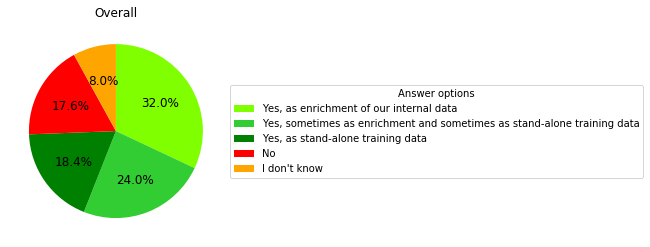

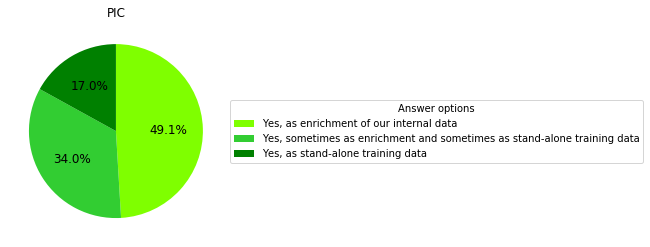

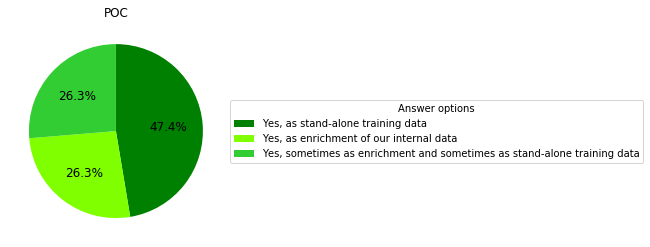

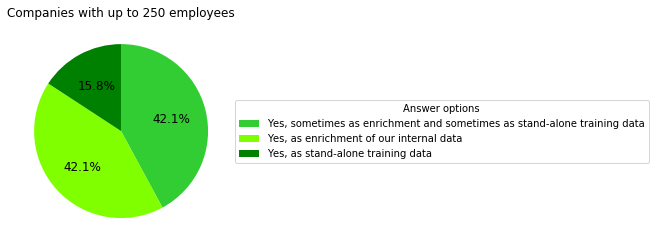

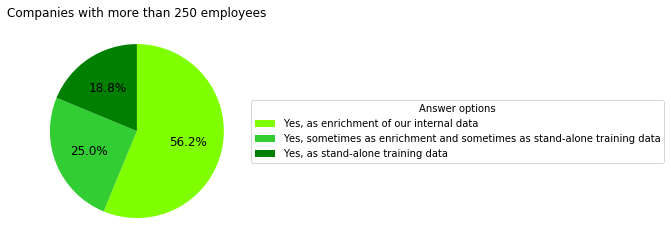

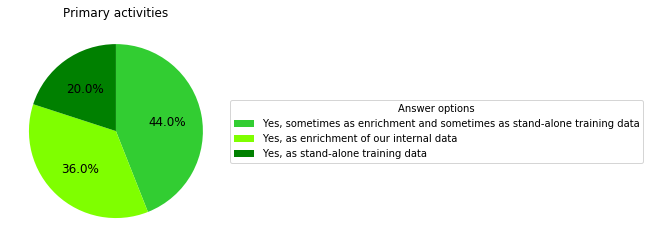

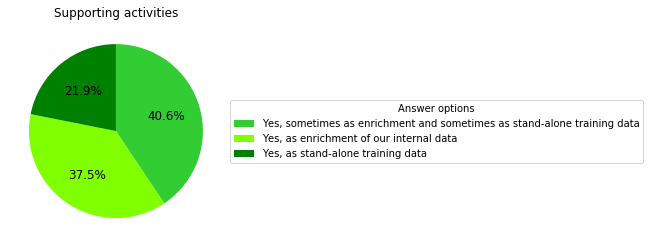

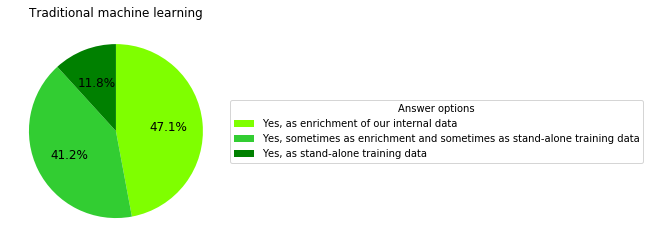

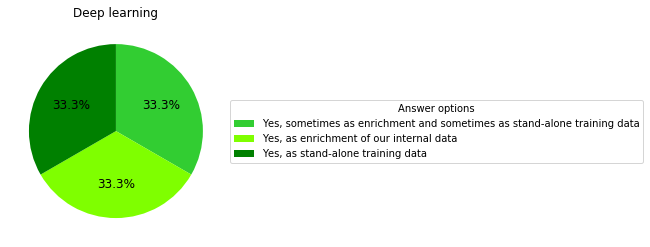

In [56]:
#Q1 - external data usage in ML
Q1=data["1. Are you using external data sources for the training of Machine Learning models?"]
datause=Q1.value_counts()
partQ1=datause.sum()


print(partQ1, "participants answered the question 'Are you using external data sources for the training of Machine Learning models?' as follows:")

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%".format(pct, absolute)

plt.figure(0) #overall
labels=list(datause.index)  
sizes=list(datause)
wedges, texts, autotexts = plt.pie(sizes, autopct=lambda pct: func(pct, sizes), colors=["chartreuse", "limegreen", "green", "red", "orange"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Overall")

plt.figure(1) #inside companies
trueforcompany=data["1. Are you using external data sources for the training of Machine Learning models?"]
trueforcompanycount=trueforcompany[filter_incompany].value_counts().drop(labels="I don't know")
labels1=list(trueforcompanycount.index)
sizes1=(list(trueforcompanycount))
wedges, texts, autotexts = plt.pie(sizes1, autopct=lambda pct: func(pct, sizes1), colors=["chartreuse", "limegreen", "green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels1,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("PIC")


plt.figure(2) #outside companies
trueforoutsidecount=trueforcompany[filter_outcompany].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=[ "green","chartreuse", "limegreen"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("POC")

plt.figure(3) #small companies
trueforoutsidecount=trueforcompany[filter_small].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=[ "limegreen","chartreuse","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Companies with up to 250 employees")

plt.figure(4) #large companies
trueforoutsidecount=trueforcompany[filter_large].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=[ "chartreuse","limegreen","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Companies with more than 250 employees")


plt.figure(5) #primary activities
trueforoutsidecount=trueforcompany[filter_primary].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=[ "limegreen","chartreuse","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Primary activities")

plt.figure(6) #supporting activities
trueforoutsidecount=trueforcompany[filter_supporting].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=["limegreen","chartreuse","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Supporting activities")

plt.figure(7) #supporting activities
trueforoutsidecount=trueforcompany[filter_ML].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=["chartreuse","limegreen","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Traditional machine learning")

plt.figure(8) #supporting activities
trueforoutsidecount=trueforcompany[filter_DL].value_counts()
labels2=list(trueforoutsidecount.index)
sizes2=(list(trueforoutsidecount))
wedges, texts, autotexts = plt.pie(sizes2, autopct=lambda pct: func(pct, sizes2), colors=["limegreen","chartreuse","green"], 
                                    startangle=90, counterclock=False)
plt.legend(wedges, labels2,
          title="Answer options",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=12)
plt.title("Deep learning")

plt.show()

In [57]:
#drop the irrelevant participants
criteria1=data[data["1. Are you using external data sources for the training of Machine Learning models?"]=="No"].index
criteria2=data[data["1. Are you using external data sources for the training of Machine Learning models?"]=="I don't know"].index
print(len(criteria1), "participants were filtered out since they were not using external data for the training of ML models, an additional", len(criteria2))
print("were filtered out since they did not know whether or not they were using external data.")
data=data.drop(index=criteria1)
data=data.drop(index=criteria2)

22 participants were filtered out since they were not using external data for the training of ML models, an additional 10
were filtered out since they did not know whether or not they were using external data.


In [58]:
#Question 2 to 4
#Q2 - Company context
Q2=data["2. Are you currently working for a company that deploys Machine Learning in any organizational unit?"]

#Q3 - Out of company context
Q3=data["3. Are you working with Machine Learning outside of a company?"]

#Q4 - Outside of company but industry-affiliation
Q4=data["4. Can the models you are training be used in a specific industrial or organizational context?"]

partQ2=Q2.value_counts().sum()

partQ3=Q3.value_counts().sum()

partQ4=Q4.value_counts().sum()

criteria3=data[Q3=="No"].index
data=data.drop(index=criteria3)
partQ4=Q4.value_counts().sum()

criteria4=data[Q4=="No"].index
data=data.drop(index=criteria4)

print(len(criteria3), "participants were filtered out since they were neither working with ML inside of a company nor outside, an additional", len(criteria4))
print("were filtered out since their models are not developed to be used in a specific industrial context.")

6 participants were filtered out since they were neither working with ML inside of a company nor outside, an additional 7
were filtered out since their models are not developed to be used in a specific industrial context.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In total 47 participants answered the question regarding industry affiliation. 13 from outside of companies and 34 from inside of companies.
Research                                3.0
Banking                                 3.0
Computer Software                       3.0
Investment Banking                      2.0
Hospital &amp; Health Care              1.0
Architecture &amp; Planning             1.0
Aviation &amp; Aerospace                1.0
Capital Markets                         1.0
Chemicals                               1.0
Computer &amp; Network Security         1.0
Construction                            1.0
Defense &amp; Space                     1.0
Entertainment                           1.0
Fine Art                                1.0
Government Administration               1.0
Government Relations                    1.0
Information Technology and Services     1.0
Real Estate                             1.0
Leisure, Travel &amp; Tourism           1.0
Market Research        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: UserWarning: Boolean Series key will be reindexed to match Da

DISCLAIMER: Industry groups are ambiguous. Due to their recoding from industries to industry groups and the used
atribution table from the Linkedin developer page, some industries allow the connection to more than one group, e.g.
'Accounting' belongs to 'Finance' and 'Corporate', 'Media Broadcast ' belongs to 'Recreation' as well as 'Media &
Entertainment'.
This means that even though only 47 participants have answered the industry affiliation question, there are 86.0
entries for industry groups. Furthermore, participants who are working on ML models outside of companies were able to select
more than one industry.

Due to the low participation rate, only filters for industry groups with more than 10 participants will be chosen.
The relevant industry groups are marked in green and are 'Technology' (16), 'Finance' (13) and 'Government' (11)


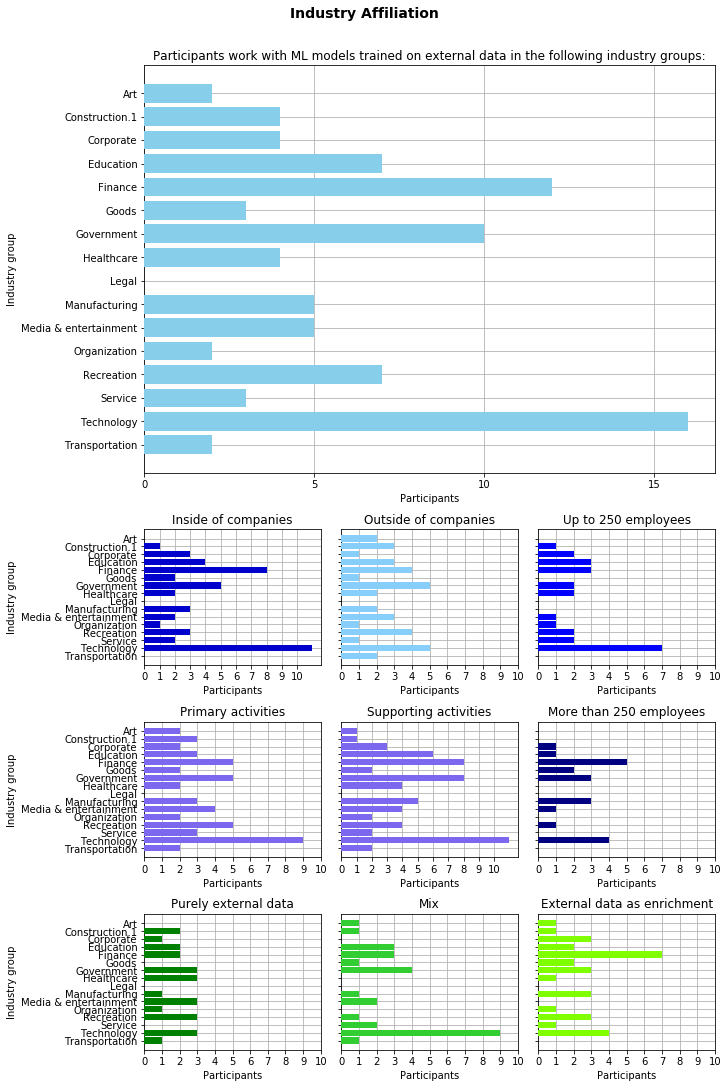

In [61]:
#Q5&10 - Industry & industry group affiliation
Q5and10=data.loc[:,"Accounting":"Writing and Editing"]
ind_group=data.loc[:,"Art":"Transportation"]
ind_group.rename(columns={"Construction.1": "Construction"})
partQ5=np.sum(Q5and10[filter_outcompany].sum(axis=1)>0)

partQ10=np.sum(Q5and10[filter_incompany].sum(axis=1)>0)


print("In total", partQ5+partQ10, "participants answered the question regarding industry affiliation.", partQ5,"from outside of companies and", partQ10, "from inside of companies.")
#industries from inside of company
print(Q5and10[filter_outcompany].dropna(axis=1,how="all").sum().sort_values(ascending=False))
#industries from outside of company
print(Q5and10[filter_incompany].dropna(axis=1,how="all").sum().sort_values(ascending=False))

totalindustrygroups=ind_group.sum().sum()
industryrows=ind_group.sum(axis=1)>0
countQ4=industryrows.sum()
print("Q4.",countQ4, "participants have answered the question about which industry they are working in or in which industry their")
print("models may be used.")
# create a figure, use the best avalable layout and add a gridspec
fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(6, 3) 
fig.suptitle("Industry Affiliation", fontsize=14, fontweight='bold')
values=ind_group.sum()
ypos=np.arange(len(values))
labels=ind_group.sum().index

# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.barh(ypos, values, zorder=3, color="skyblue")
big.grid(b=True, axis="both", zorder=0)
big.set(title='Overall',xticks=[0,5,10,15], xticklabels=[0,5,10,15], ylabel="Industry group", xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=labels)
big.invert_yaxis() #inverse y-axis --> start with art and end with transportation
big.set_title("Participants work with ML models trained on external data in the following industry groups:")

small1=fig.add_subplot(gs[3,0])
small1.barh(ypos, ind_group[filter_incompany].sum(), zorder=3, color="mediumblue")
small1.grid(b=True, axis="both", zorder=0)
small1.set(title='Inside of companies', xlabel="Participants", ylabel="Industry group", yticks=np.arange(len(ypos)), yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small1.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small2=fig.add_subplot(gs[3,1])
small2.barh(ypos, ind_group[filter_outcompany].sum(), zorder=3, color="lightskyblue")
small2.grid(b=True, axis="both", zorder=0)
small2.set(title='Outside of companies',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small2.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small3=fig.add_subplot(gs[3,2])
small3.barh(ypos, ind_group[filter_small].sum(), zorder=3, color="blue")
small3.grid(b=True, axis="both", zorder=0)
small3.set(title='Up to 250 employees',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small3.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small4=fig.add_subplot(gs[4,0])
small4.barh(ypos, ind_group[filter_primary].sum(), zorder=3, color="mediumslateblue")
small4.grid(b=True, axis="both", zorder=0)
small4.set(title='Primary activities', xlabel="Participants", ylabel="Industry group", yticks=np.arange(len(ypos)), yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small4.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small5=fig.add_subplot(gs[4,1])
small5.barh(ypos, ind_group[filter_supporting].sum(), zorder=3, color="mediumslateblue")
small5.grid(b=True, axis="both", zorder=0)
small5.set(title='Supporting activities',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small5.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small6=fig.add_subplot(gs[4,2])
small6.barh(ypos, ind_group[filter_large].sum(), zorder=3, color="navy")
small6.grid(b=True, axis="both", zorder=0)
small6.set(title='More than 250 employees',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small6.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small7=fig.add_subplot(gs[5,0])
small7.barh(ypos, ind_group[filter_only].sum(), zorder=3, color="green")
small7.grid(b=True, axis="both", zorder=0)
small7.set(title='Purely external data', xlabel="Participants", ylabel="Industry group", yticks=np.arange(len(ypos)), yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small8=fig.add_subplot(gs[5,1])
small8.barh(ypos, ind_group[filter_mix].sum(), zorder=3, color="limegreen")
small8.grid(b=True, axis="both", zorder=0)
small8.set(title='Mix',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small8.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small9=fig.add_subplot(gs[5,2])
small9.barh(ypos, ind_group[filter_enrich].sum(), zorder=3, color="chartreuse")
small9.grid(b=True, axis="both", zorder=0)
small9.set(title='External data as enrichment',xlabel="Participants", yticks=np.arange(len(ypos)), yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.invert_yaxis() 


fig.set_figheight(15)
fig.set_figwidth(10)

print("DISCLAIMER: Industry groups are ambiguous. Due to their recoding from industries to industry groups and the used")
print("atribution table from the Linkedin developer page, some industries allow the connection to more than one group, e.g.")
print("'Accounting' belongs to 'Finance' and 'Corporate', 'Media Broadcast ' belongs to 'Recreation' as well as 'Media &")
print("Entertainment'.")
print("This means that even though only", countQ4, "participants have answered the industry affiliation question, there are", totalindustrygroups)
print("entries for industry groups. Furthermore, participants who are working on ML models outside of companies were able to select")
print("more than one industry.")
print()
print("Due to the low participation rate, only filters for industry groups with more than 10 participants will be chosen.")
print("The relevant industry groups are marked in green and are 'Technology' (16), 'Finance' (13) and 'Government' (11)")

In total 48 participants answered the question regarding country affiliation - 13 from outside of companies and 35 from inside of companies.


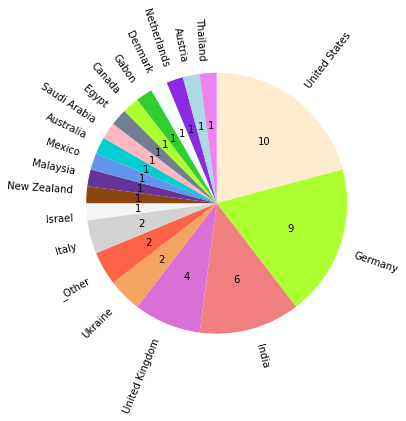

United States     10
Germany            9
India              6
United Kingdom     4
Ukraine            2
_Other             2
Italy              2
Israel             1
New Zealand        1
Malaysia           1
Mexico             1
Australia          1
Saudi Arabia       1
Egypt              1
Canada             1
Gabon              1
Denmark            1
Netherlands        1
Austria            1
Thailand           1
Name: Country, dtype: int64


In [62]:
#Question 7 and 9
#Q7&9 - Country
Q7and9=data["Country"]
countrydistribution=Q7and9.value_counts()
partQ7=Q7and9[filter_outcompany].value_counts().sum()
partQ9=Q7and9[filter_incompany].value_counts().sum()
print("In total", partQ7+partQ9, "participants answered the question regarding country affiliation -", partQ7,"from outside of companies and", partQ9, "from inside of companies.")


#create visual
import random
import matplotlib.colors as mcolors
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(countrydistribution))
plt.pie(x=countrydistribution, labels=countrydistribution.index.tolist(), colors=colors, startangle=90,radius=1.5, 
       counterclock=False, rotatelabels=True, autopct=lambda p: '{:.0f}'.format(p * countrydistribution.sum() / 100))
plt.savefig('Countrypiechart.png')
plt.show()

print(countrydistribution)

35 participants have answered the question about company size, 30 have disclosed their jobtitles.
19 participants are working in SMEs, 16 participants are working in companies with more than 250 employees.


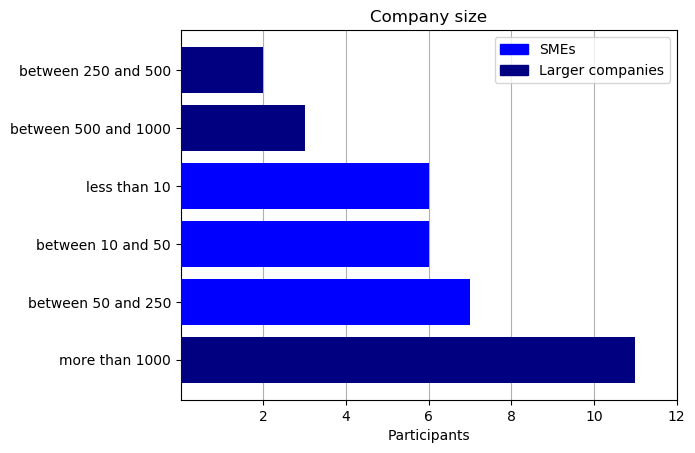

Senior Data Scientist
Lead Data Scientist
Data scientist
ML Researcher
Data Scientist
Head of Computer Vision Solutions
CEO
Data Scientist
Data Engineer
Data Scientist
Data Scientist
Managing Director &amp; Member of the Executive Board
Data scientist
Phd student
Analyst
Big data engineer
Principal Investigator
Research Assistant
Head of Research
Sr director of data science
Customer Success Manager
Data Scientist
Csm
President
Machine Learning Engineer - II
Data scientist internship
Director
Sr. Machine Learning Engineer
Director of AI
Data Scientist


In [65]:
#Question 8 and 11
#Q8 - Company size
Q8=data["8. How many people are employed at the company you are working at?"]

#Q11 - Job title
Q11=data["11. What is your job title?"]
partQ8=Q8.value_counts().sum()

partQ11=len(Q11.dropna().index)

print(partQ8, "participants have answered the question about company size,", partQ11, "have disclosed their jobtitles.")
print(filter_small.sum(), "participants are working in SMEs,", filter_large.sum(), "participants are working in companies with more than 250 employees.")
plt.rcdefaults()
fig, ax = plt.subplots()

labels=Q8.value_counts().index

values=Q8.value_counts()
values=(values)
ypos=np.arange(len(values))

ax.barh(ypos, values, zorder=3, color=["navy","blue", "blue", "blue","navy", "navy"])
ax.set(yticks=np.arange(len(ypos)),xlabel="Participants", xticks=[2,4,6,8,10,12], yticklabels=labels, title="Company size")
ax.grid(b=True, axis="x", zorder=0)

import matplotlib.patches as mpatches

SME = mpatches.Patch(color='blue', label='SMEs')
largerComp=mpatches.Patch(color='navy', label='Larger companies')
plt.legend(handles=[SME,largerComp])

plt.show()
#which job titles were entered
for i in Q11.dropna():
    print(i)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In total 40 participants answered the question regarding country affiliation - 11 from outside of companies and 29
from inside of companies.
Q5. participants have answered the question about the application area of their ML models. 25 of which are
deploying models in primary activities, and 32 are deploying models in supporting activities of the value chain.

Due to the low participation rate, only filters for application areas with more than 10 participants will be chosen.
The relevant application areas are marked in green and are 'research & development' (26), 'marketing, sales & distri-
bution' (15), 'finances & controlling' (14), production (13) and 'service' (11).

Primary vs supporting activities allow comparison to some extent. 25 participants are using ML models trained on external data in primary activities 32 in secondary activities.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Boolean Series key will be reindexed to match Da

On average, participants are applying ML across 2.875 functions of the value chain.


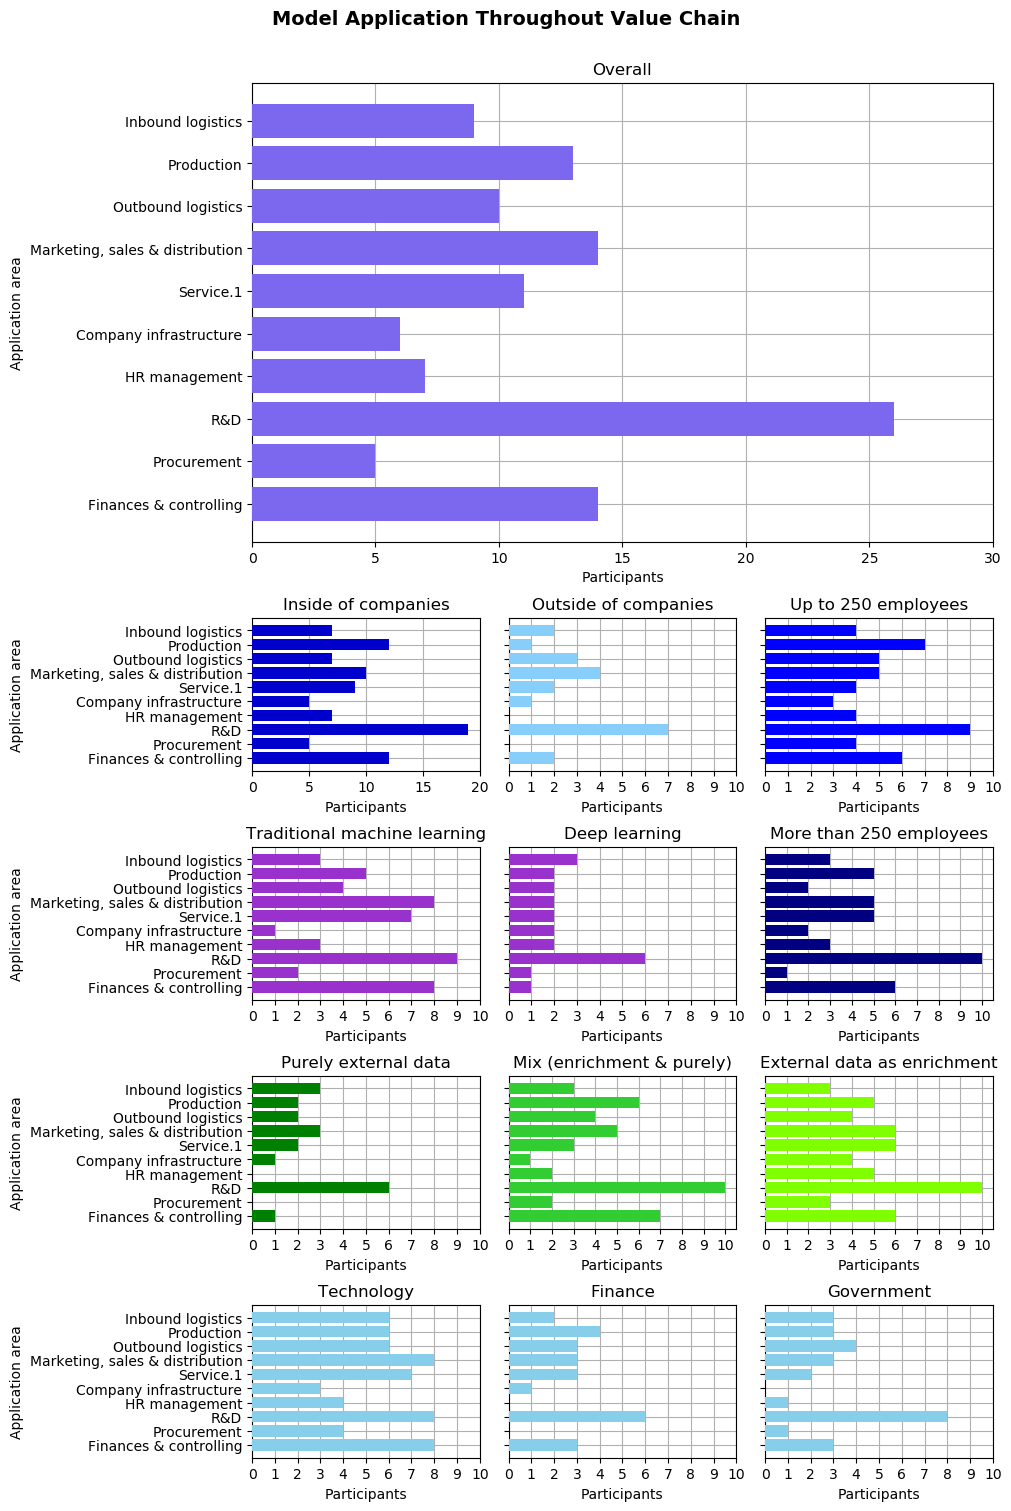

In [72]:
#Q6&12 - Value chain application area
Q6and12=data.loc[:,"Inbound logistics":"Finances & controlling"]

partQ6=np.sum(Q6and12[filter_outcompany].sum(axis=1)>0)

partQ12=np.sum(Q6and12[filter_incompany].sum(axis=1)>0)

print("In total", partQ6+partQ12, "participants answered the question regarding country affiliation -",partQ6,"from outside of companies and", partQ12)
print("from inside of companies.")

print("Q5.", "participants have answered the question about the application area of their ML models.", filter_primary.sum(), "of which are")
print("deploying models in primary activities, and",filter_supporting.sum() , "are deploying models in supporting activities of the value chain.")
print()
print("Due to the low participation rate, only filters for application areas with more than 10 participants will be chosen.")
print("The relevant application areas are marked in green and are 'research & development' (26), 'marketing, sales & distri-")
print("bution' (15), 'finances & controlling' (14), production (13) and 'service' (11).")
print()
print("Primary vs supporting activities allow comparison to some extent.", filter_primary.sum(), "participants are using ML models trained on external data in primary activities", filter_supporting.sum(),"in secondary activities.")


#visualize
# create a figure, use the best avalable layout and add a gridspec
fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(7, 3) 
fig.suptitle("Model Application Throughout Value Chain", fontsize=14, fontweight='bold')
#visualize
#data
value_chain=Q6and12
labels =value_chain.columns.tolist()
y_pos = np.arange(len(labels)) 
    
# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.set_title('Overall')
big.barh(y_pos, value_chain.sum() ,color="mediumslateblue", zorder=3)
big.set(yticks=y_pos, yticklabels=labels,xticks=[0,5,10,15,20,25,30], ylabel="Application area", xlabel="Participants", xticklabels=[0,5,10,15,20,25,30])
big.grid(b=True, axis="both", zorder=0)
big.invert_yaxis()


small1=fig.add_subplot(gs[3,0])
small1.set_title('Inside of companies')
small1.barh(y_pos,value_chain[filter_incompany].sum(), align='center', color="mediumblue", zorder=3)
small1.set(yticks=y_pos, yticklabels=labels,xticks=[0,5,10,15,20], ylabel="Application area", xlabel="Participants", xticklabels=[0,5,10,15,20])
small1.grid(b=True, axis="both", zorder=0)
small1.invert_yaxis()

small2=fig.add_subplot(gs[3,1])
small2.set_title('Outside of companies')
small2.barh(y_pos,value_chain[filter_outcompany].sum(), align='center', color="lightskyblue", zorder=3)
small2.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small2.grid(b=True, axis="both", zorder=0)
small2.invert_yaxis()

small3=fig.add_subplot(gs[3,2])
small3.set_title('Up to 250 employees')
small3.barh(y_pos,value_chain[filter_small].sum(), align='center', color="blue", zorder=3)
small3.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small3.grid(b=True, axis="both", zorder=0)
small3.invert_yaxis()

small4=fig.add_subplot(gs[4,0])
small4.set_title('Traditional machine learning')
small4.barh(y_pos,value_chain[filter_ML].sum(), color="darkorchid", zorder=3)
small4.set(yticks=y_pos, yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], ylabel="Application area", xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small4.grid(b=True, axis="both", zorder=0)
small4.invert_yaxis()

small5=fig.add_subplot(gs[4,1])
small5.set_title('Deep learning')
small5.barh(y_pos,value_chain[filter_DL].sum(), color="darkorchid", zorder=3)
small5.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small5.grid(b=True, axis="both", zorder=0)
small5.invert_yaxis()

small6=fig.add_subplot(gs[4,2])
small6.set_title('More than 250 employees')
small6.barh(y_pos,value_chain[filter_large].sum(), align='center', color="navy", zorder=3)
small6.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small6.grid(b=True, axis="both", zorder=0)
small6.invert_yaxis() 

small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(y_pos, value_chain[filter_only].sum(), align='center',color="green", zorder=3)
small7.set(yticks=y_pos, yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], ylabel="Application area", xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.grid(b=True, axis="both", zorder=0)
small7.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(y_pos,value_chain[filter_mix].sum(), align='center', color="limegreen", zorder=3)
small8.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small8.grid(b=True, axis="both", zorder=0)
small8.invert_yaxis()

small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(y_pos,value_chain[filter_enrich].sum(), align='center', color="chartreuse",zorder=3)
small9.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)
small9.invert_yaxis()

small10=fig.add_subplot(gs[6,0])
small10.set_title('Technology')
small10.barh(y_pos, value_chain[filter_tech].sum(), align='center',color="skyblue", zorder=3)
small10.set(yticks=y_pos, yticklabels=labels,xticks=[0,1,2,3,4,5,6,7,8,9,10], ylabel="Application area", xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small10.grid(b=True, axis="both", zorder=0)
small10.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small11=fig.add_subplot(gs[6,1])
small11.set_title('Finance')
small11.barh(y_pos,value_chain[filter_fin].sum(), align='center', color="skyblue", zorder=3)
small11.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10], xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small11.grid(b=True, axis="both", zorder=0)
small11.invert_yaxis()

small12=fig.add_subplot(gs[6,2])
small12.set_title('Government')
small12.barh(y_pos,value_chain[filter_gov].sum(), align='center', color="skyblue",zorder=3)
small12.set(yticks=y_pos, yticklabels=[],xticks=[0,1,2,3,4,5,6,7,8,9,10],  xlabel="Participants", xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small12.grid(b=True, axis="both", zorder=0)
small12.invert_yaxis()

fig.set_figheight(15)
fig.set_figwidth(10)

fig.savefig('valuechainplot.png')


applyML=Q6and12.sum(axis=1)
print("On average, participants are applying ML across", np.mean(applyML[applyML>0]), "functions of the value chain." )

Q14 & 15 31 participants answered the questiosn regarding data selection criteria.

One participant added ' 104    Cost
Name: Textfeld, dtype: object ' as data selection criterion.

One participant has described his data selection process as follows:
' 70    Looking up on google or asking in communities ...
Name: 15. How are you choosing your external data sources?, dtype: object '


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:71: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:85: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:92: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:99: UserWarning: Boolean Series key will be reindexed to match Da

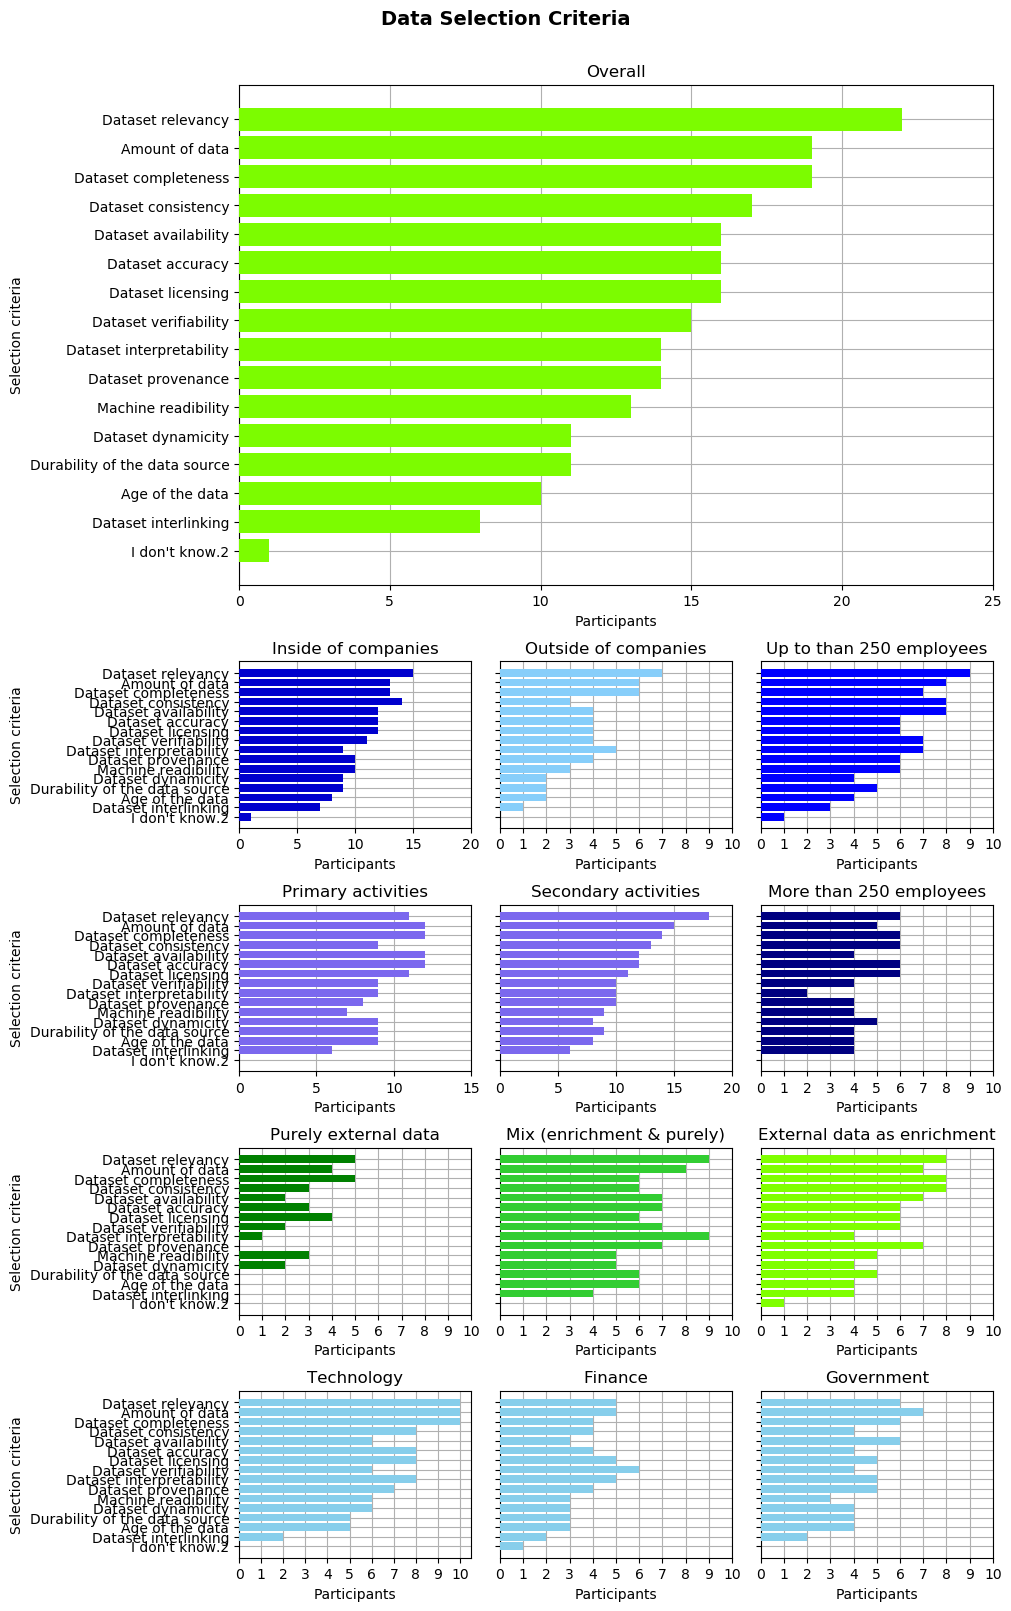

In [73]:
#Q13-15 - How is data selected?
#Q13 - Use of selection criteria
Q13=data["13. Are you choosing external data according to selection criteria?"]
partQ13=len(Q13.dropna().index)

#Q14 - Data selection criteria
Q14=data.loc[:,"Machine readibility":"Textfeld"]
partQ14=len(Q14.dropna(axis=0,how="all").index)

#Q15 - Alternative data selection
Q15=data["15. How are you choosing your external data sources?"]
partQ15=len(Q15.dropna().index)


selection_criteria_df=Q14
countQ6=len(selection_criteria_df.dropna(how="all").index)
selection_criteria_df.columns=['Machine readibility', 'Dataset completeness', 'Amount of data','Dataset relevancy',
                               'Dataset provenance', 'Dataset verifiability','Dataset licensing', 'Dataset accuracy',
                               'Dataset interlinking','Dataset consistency','Dataset availability',
                               'Durability of the data source','Dataset interpretability','Age of the data', 
                               'Dataset dynamicity',"I don't know.2", 'Textfeld']

selection_criteria_df=selection_criteria_df.drop(columns="Textfeld")
new_order=selection_criteria_df.sum().sort_values(ascending=False).index.tolist()
selection_criteria_df=selection_criteria_df[new_order]

#Q6 summary

print("Q14 & 15", partQ14+partQ15, "participants answered the questiosn regarding data selection criteria.")
print()            
print("One participant added '", Q14.loc[Q14["Textfeld"].dropna().index,"Textfeld"], "' as data selection criterion.")
print()
print("One participant has described his data selection process as follows:")
print("'",Q15[Q15.dropna().index],"'")


#visualize
# create a figure, use the best avalable layout and add a gridspec
fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(7, 3) 
fig.suptitle("Data Selection Criteria", fontsize=14, fontweight='bold')
#visualize
#data
labels = (list(selection_criteria_df.columns))
y_pos = np.arange(len(labels))
    
# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.set_title("Overall")
big.barh(y_pos, selection_criteria_df.sum() ,color='lawngreen', zorder=3)
big.set(yticks=y_pos, yticklabels=labels,ylabel="Selection criteria", xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])
big.grid(b=True, axis="both", zorder=0)
big.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small1=fig.add_subplot(gs[3,0])
small1.set_title('Inside of companies')
small1.barh(y_pos,selection_criteria_df[filter_incompany].sum(), align='center', color="mediumblue", zorder=3)
small1.set(yticks=y_pos, yticklabels=labels,ylabel="Selection criteria", xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small1.grid(b=True, axis="both", zorder=0)
small1.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small2=fig.add_subplot(gs[3,1])
small2.set_title('Outside of companies')
small2.barh(y_pos,selection_criteria_df[filter_outcompany].sum(), align='center', color="lightskyblue", zorder=3)
small2.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small2.grid(b=True, axis="both", zorder=0)
small2.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small3=fig.add_subplot(gs[3,2])
small3.set_title("Up to than 250 employees")
small3.barh(y_pos,selection_criteria_df[filter_small].sum(), color="blue", zorder=3)
small3.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small3.grid(b=True, axis="both", zorder=0)
small3.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small4=fig.add_subplot(gs[4,0])
small4.set_title('Primary activities')
small4.barh(y_pos, selection_criteria_df[filter_primary].sum(), align='center',color="mediumslateblue", zorder=3)
small4.set(yticks=y_pos, yticklabels=labels,ylabel="Selection criteria", xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small4.grid(b=True, axis="both", zorder=0)
small4.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small5=fig.add_subplot(gs[4,1])
small5.set_title('Secondary activities')
small5.barh(y_pos,selection_criteria_df[filter_supporting].sum(), align='center', color="mediumslateblue", zorder=3)
small5.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small5.grid(b=True, axis="both", zorder=0)
small5.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small6=fig.add_subplot(gs[4,2])
small6.set_title('More than 250 employees')
small6.barh(y_pos,selection_criteria_df[filter_large].sum(), align='center', color="navy", zorder=3)
small6.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small6.grid(b=True, axis="both", zorder=0)
small6.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(y_pos, selection_criteria_df[filter_only].sum(), align='center',color="green", zorder=3)
small7.set(yticks=y_pos, yticklabels=labels,ylabel="Selection criteria", xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.grid(b=True, axis="both", zorder=0)
small7.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(y_pos,selection_criteria_df[filter_mix].sum(), align='center', color="limegreen", zorder=3)
small8.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small8.grid(b=True, axis="both", zorder=0)
small8.invert_yaxis()

small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(y_pos,selection_criteria_df[filter_enrich].sum(), align='center', color="chartreuse",zorder=3)
small9.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)
small9.invert_yaxis()

small10=fig.add_subplot(gs[6,0])
small10.set_title('Technology')
small10.barh(y_pos, selection_criteria_df[filter_tech].sum(), align='center',color="skyblue", zorder=3)
small10.set(yticks=y_pos, yticklabels=labels,ylabel="Selection criteria", xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small10.grid(b=True, axis="both", zorder=0)
small10.invert_yaxis() #inverse y-axis --> start with art and end with transportation

small11=fig.add_subplot(gs[6,1])
small11.set_title('Finance')
small11.barh(y_pos,selection_criteria_df[filter_fin].sum(), align='center', color="skyblue", zorder=3)
small11.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small11.grid(b=True, axis="both", zorder=0)
small11.invert_yaxis()

small12=fig.add_subplot(gs[6,2])
small12.set_title('Government')
small12.barh(y_pos,selection_criteria_df[filter_gov].sum(), align='center', color="skyblue",zorder=3)
small12.set(yticks=y_pos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small12.grid(b=True, axis="both", zorder=0)
small12.invert_yaxis()

fig.set_figheight(16)
fig.set_figwidth(10)

fig.savefig('Q14plot.png')

Q17. 31 participants have disclosed whether the data they are using to train their models is structured, unstructured or
a mix between the two.


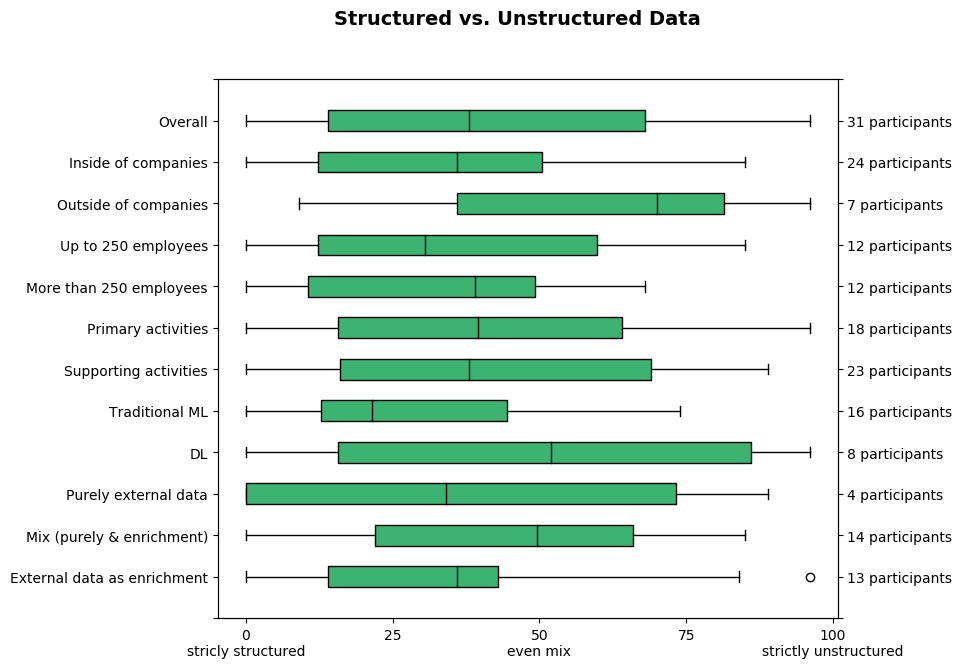

23 participants have stated that there are certain file formats they prefer or refrain from using.

            File format Count prefer Count refrain
0                   csv           20             2
1                  xlsx           11             6
2                  json            7             5
3               parquet            5             0
4                   dat            4             0
5                   txt            4             2
6                   sql            3             1
7                   xml            2             0
8                   tar            1             1
9                   mat            1             2
10                 html            1             0
11                  yml            1             0
12                   pt            1             0
13                  png            1             0
14                  cif            1             0
15                  mkv            1             0
16                image          

In [74]:
#Question 16 - 20 - Which data structure and file formats are used?
#Q16 - Knowledge about data structure
Q16=data["16. Do you know whether your models are trained on structured or unstructured data or even a mix between the two?"]
partQ16=Q16.value_counts().sum()

#Q17 - Data structure
Q17=data["17. Please estimate the distribution between structured and unstructured data sources you are using for the training of Machine Learning models"]
partQ17=len(Q17.dropna().index)
overall_datastructure=Q17.dropna()

print("Q17.",partQ17, "participants have disclosed whether the data they are using to train their models is structured, unstructured or")
print("a mix between the two.")
datastructure_df=[overall_datastructure, overall_datastructure[filter_incompany], overall_datastructure[filter_outcompany],
              overall_datastructure[filter_small], overall_datastructure[filter_large], overall_datastructure[filter_primary]
              , overall_datastructure[filter_supporting], overall_datastructure[filter_ML], overall_datastructure[filter_DL],
                 overall_datastructure[filter_only], overall_datastructure[filter_mix], overall_datastructure[filter_enrich]]
#visualize
answercounts=[""]
for i in datastructure_df:
    answercounts.append(str(i.count()) + " participants")

ypos=np.arange(len(datastructure_df)+2)

# figure related code
fig = plt.figure()
fig.suptitle("Structured vs. Unstructured Data", fontsize=14, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(8)
ax = fig.add_subplot(111)
ax.boxplot(datastructure_df, vert=False,patch_artist=True, boxprops=dict(facecolor='mediumseagreen', color="black"),
            medianprops=dict(color="black"))

ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels(["0\nstricly structured", 25,"50\neven mix", 75, "100\nstrictly unstructured"])
ax.set_yticks(ypos)
ax.set_ybound(lower=ypos.min(), upper=ypos.max())
ax.set_yticklabels(["","Overall","Inside of companies","Outside of companies","Up to 250 employees", "More than 250 employees", "Primary activities", "Supporting activities", "Traditional ML", "DL", "Purely external data", "Mix (purely & enrichment)","External data as enrichment"])
ax.invert_yaxis()

axRight=ax.twinx()
axRight.set_yticks(ypos)
axRight.set_yticklabels(answercounts)
axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
axRight.invert_yaxis()

fig.savefig('Q17plot.png')
plt.show()

#Which data types do you prefer or refrain from using?
#Q18 - Knowledge about file formats
Q18=data["18. Are there certain file formats that you prefer or refrain from using?"]
partQ18=len(Q18.dropna().index)

#Q19 - Preferred formats
Q19=data["19. Which file formats do you prefer?"]
partQ19=len(Q19.dropna().index)

#Q20 - Refrained from formats
Q20=data["20. Which file formats do you refrain from using?"]
partQ20=len(Q20.dropna().index)

countQ18=len(data[Q18=="Yes"].index)
print(countQ18, "participants have stated that there are certain file formats they prefer or refrain from using.")
prefer=Q19.dropna().str.lower()
refrain=Q20.dropna().str.lower()
file_formats=["csv","cif","dat","txt", "xlsx", "json", "parquet","jpeg", "pkl", "sql", "excel", "xml", "text", "image", "mkv", "png", "tar", "pt", "yml","html", "shp", "pdf", "video", "xslx", "mat", "h5", "xlxs", "docx", "proprietary formats", "nc"]
formats_df=pd.DataFrame(columns=["File format", "Count prefer", "Count refrain"])

for index, formats in enumerate(file_formats):
    formats_df.loc[index,"File format"]=formats
    formats_df.loc[index,"Count prefer"]=prefer.str.count(formats).sum()
    formats_df.loc[index,"Count refrain"]=refrain.str.count(formats).sum()
#clean and merge entries 
formats_df=formats_df.drop(index=formats_df[formats_df["File format"].isin(["excel", "xslx", "xlxs"])].index)
formats_df["Count prefer"][4]=11
formats_df=formats_df.drop(index=formats_df[formats_df["File format"].isin(["text"])].index)
formats_df["Count prefer"][3]=4
print()
print(formats_df.sort_values(by="Count prefer", ascending=False).reset_index().drop(columns="index"))
print()
for i in prefer:
    print(i)

Q8. 37 participants have answered the question about which data providers they are relying on.
26 from inside of companies and 11 from outside.
One participant added ' 2    SparkBeyond world datasets
Name: Textfeld.1, dtype: object ' as additional data provider.
But this will be neglected as this individual has used every open question to advertise this company.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Boolean Series key will be reindexed

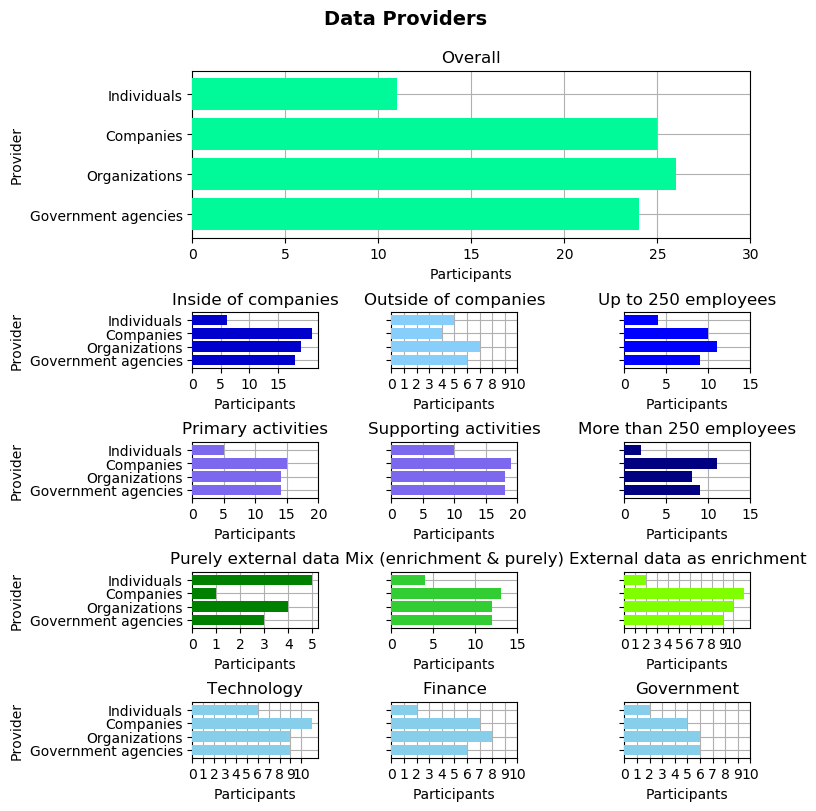

In [75]:
#Q21 - Data providers
Q21=data.loc[:,"government agencies (incl. universities)":"Textfeld.1"]
partQ21=len(Q21.dropna(axis=0,how="all").index)

data_providers=Q21.drop(columns=['Textfeld.1'])
print("Q8.", partQ21, "participants have answered the question about which data providers they are relying on.")
print(len(data_providers[filter_incompany].dropna(axis=0,how="all").index), "from inside of companies and", len(data_providers[filter_outcompany].dropna(axis=0,how="all").index),"from outside.")
print("One participant added '", data.loc[Q21['Textfeld.1'].dropna().index,"Textfeld.1"],"' as additional data provider.")
print("But this will be neglected as this individual has used every open question to advertise this company.")
# create a figure, use the best avalable layout and add a gridspec
fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(7, 3) 
fig.suptitle("Data Providers", fontsize=14, fontweight='bold')
values=data_providers.sum()
ypos=np.arange(len(values))
labels=["Government agencies", "Organizations", "Companies", "Individuals"]

# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.barh(ypos, values, zorder=3, color='mediumspringgreen')
big.grid(b=True, axis="both", zorder=0)
big.set(title='Overall',ylabel="Provider", xlabel="Participants", xticks=[0,5,10,15,20,25,30], xticklabels=[0,5,10,15,20,25,30], yticks=np.arange(len(ypos)), yticklabels=labels)

small1=fig.add_subplot(gs[3,0])
small1.barh(ypos, data_providers[filter_incompany].sum(), zorder=3, color="mediumblue")
small1.grid(b=True, axis="both", zorder=0)
small1.set(title='Inside of companies', yticks=np.arange(len(ypos)), yticklabels=labels,ylabel="Provider", xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])

small2=fig.add_subplot(gs[3,1])
small2.barh(ypos, data_providers[filter_outcompany].sum(), zorder=3, color="lightskyblue")
small2.grid(b=True, axis="both", zorder=0)
small2.set(title='Outside of companies',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])


small3=fig.add_subplot(gs[3,2])
small3.barh(ypos, data_providers[filter_small].sum(), zorder=3, color="blue")
small3.grid(b=True, axis="both", zorder=0)
small3.set(title='Up to 250 employees',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])


small4=fig.add_subplot(gs[4,0])
small4.barh(ypos, data_providers[filter_primary].sum(), zorder=3, color="mediumslateblue")
small4.grid(b=True, axis="both", zorder=0)
small4.set(title='Primary activities', yticks=np.arange(len(ypos)), yticklabels=labels,ylabel="Provider", xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])


small5=fig.add_subplot(gs[4,1])
small5.barh(ypos, data_providers[filter_supporting].sum(), zorder=3, color="mediumslateblue")
small5.grid(b=True, axis="both", zorder=0)
small5.set(title='Supporting activities',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])


small6=fig.add_subplot(gs[4,2])
small6.barh(ypos, data_providers[filter_large].sum(), zorder=3, color="navy")
small6.grid(b=True, axis="both", zorder=0)
small6.set(title='More than 250 employees',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])


small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(ypos, data_providers[filter_only].sum(), align='center',color="green", zorder=3)
small7.set(yticks=ypos, yticklabels=labels,ylabel="Provider", xlabel="Participants", xticks=[0,1,2,3,4,5], xticklabels=[0,1,2,3,4,5])
small7.grid(b=True, axis="both", zorder=0)

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(ypos,data_providers[filter_mix].sum(), align='center', color="limegreen", zorder=3)
small8.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small8.grid(b=True, axis="both", zorder=0)


small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(ypos,data_providers[filter_enrich].sum(), align='center', color="chartreuse",zorder=3)
small9.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)

small10=fig.add_subplot(gs[6,0])
small10.set_title('Technology')
small10.barh(ypos, data_providers[filter_tech].sum(), align='center',color="skyblue", zorder=3)
small10.set(yticks=ypos, yticklabels=labels,ylabel="Provider", xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small10.grid(b=True, axis="both", zorder=0)

small11=fig.add_subplot(gs[6,1])
small11.set_title('Finance')
small11.barh(ypos,data_providers[filter_fin].sum(), align='center', color="skyblue", zorder=3)
small11.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small11.grid(b=True, axis="both", zorder=0)

small12=fig.add_subplot(gs[6,2])
small12.set_title('Government')
small12.barh(ypos,data_providers[filter_gov].sum(), align='center', color="skyblue",zorder=3)
small12.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small12.grid(b=True, axis="both", zorder=0)

fig.set_figheight(8)
fig.set_figwidth(8)
fig.savefig('Q21plot.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


37 participants have answered the question regarding the exclusivity of data they are relying on - 26 from inside and 11
from outside of companies.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:83: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:97: UserWarning: Boolean Series key will be reindexed to match Da

Series([], Name: Textfeld.2, dtype: float64)

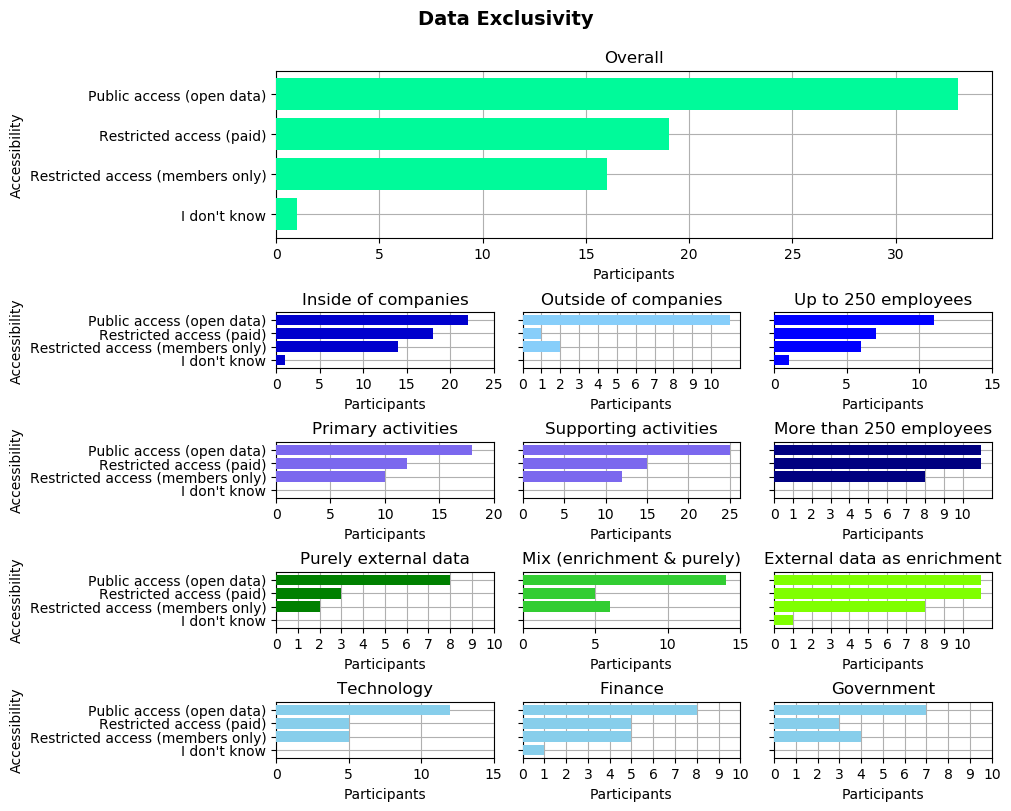

In [76]:
#Q22 - Data accessibility
Q22=data.loc[:,"Public access (open data)":"Textfeld.2"]
data_access=Q22.drop(columns=["Textfeld.2"])
data_access.columns=["Public access (open data)","Restricted access (paid)","Restricted access (members only)", "I don't know"]
partQ22=len(data_access.dropna(axis=0,how="all").index)
print(partQ22, "participants have answered the question regarding the exclusivity of data they are relying on -",len(data_access[filter_incompany].dropna(axis=0,how="all").index), "from inside and",len(data_access[filter_outcompany].dropna(axis=0,how="all").index))
print("from outside of companies.")

 # create a figure, use the best avalable layout and add a gridspec
fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(7, 3) 
fig.suptitle("Data Exclusivity", fontsize=14, fontweight='bold')
values=data_access.sum()
ypos=np.arange(len(values))
labels=data_access.sum().index

# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.barh(ypos, values, zorder=3, color='mediumspringgreen')
big.grid(b=True, axis="both", zorder=0)
big.set(title='Overall',ylabel="Accessibility", xlabel="Participants", xticks=[0,5,10,15,20,25,30], xticklabels=[0,5,10,15,20,25,30], yticks=np.arange(len(ypos)), yticklabels=labels)
big.invert_yaxis()

small1=fig.add_subplot(gs[3,0])
small1.barh(ypos, data_access[filter_incompany].sum(), zorder=3, color="mediumblue")
small1.grid(b=True, axis="both", zorder=0)
small1.set(title='Inside of companies', yticks=np.arange(len(ypos)), yticklabels=labels,ylabel="Accessibility", xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])
small1.invert_yaxis()

small2=fig.add_subplot(gs[3,1])
small2.barh(ypos, data_access[filter_outcompany].sum(), zorder=3, color="lightskyblue")
small2.grid(b=True, axis="both", zorder=0)
small2.set(title='Outside of companies',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small2.invert_yaxis()

small3=fig.add_subplot(gs[3,2])
small3.barh(ypos, data_access[filter_small].sum(), zorder=3, color="blue")
small3.grid(b=True, axis="both", zorder=0)
small3.set(title='Up to 250 employees',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small3.invert_yaxis()

small4=fig.add_subplot(gs[4,0])
small4.barh(ypos, data_access[filter_primary].sum(), zorder=3, color="mediumslateblue")
small4.grid(b=True, axis="both", zorder=0)
small4.set(title='Primary activities', yticks=np.arange(len(ypos)), yticklabels=labels,ylabel="Accessibility", xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small4.invert_yaxis()

small5=fig.add_subplot(gs[4,1])
small5.barh(ypos, data_access[filter_supporting].sum(), zorder=3, color="mediumslateblue")
small5.grid(b=True, axis="both", zorder=0)
small5.set(title='Supporting activities',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])
small5.invert_yaxis()

small6=fig.add_subplot(gs[4,2])
small6.barh(ypos, data_access[filter_large].sum(), zorder=3, color="navy")
small6.grid(b=True, axis="both", zorder=0)
small6.set(title='More than 250 employees',yticks=np.arange(len(ypos)), yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small6.invert_yaxis()

small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(ypos, data_access[filter_only].sum(), align='center',color="green", zorder=3)
small7.set(yticks=ypos, yticklabels=labels,ylabel="Accessibility", xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.grid(b=True, axis="both", zorder=0)
small7.invert_yaxis()

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(ypos,data_access[filter_mix].sum(), align='center', color="limegreen", zorder=3)
small8.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small8.grid(b=True, axis="both", zorder=0)
small8.invert_yaxis()

small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(ypos,data_access[filter_enrich].sum(), align='center', color="chartreuse",zorder=3)
small9.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)
small9.invert_yaxis()

small10=fig.add_subplot(gs[6,0])
small10.set_title('Technology')
small10.barh(ypos, data_access[filter_tech].sum(), align='center',color="skyblue", zorder=3)
small10.set(yticks=ypos, yticklabels=labels,ylabel="Accessibility", xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small10.grid(b=True, axis="both", zorder=0)
small10.invert_yaxis()

small11=fig.add_subplot(gs[6,1])
small11.set_title('Finance')
small11.barh(ypos,data_access[filter_fin].sum(), align='center', color="skyblue", zorder=3)
small11.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small11.grid(b=True, axis="both", zorder=0)
small11.invert_yaxis()

small12=fig.add_subplot(gs[6,2])
small12.set_title('Government')
small12.barh(ypos,data_access[filter_gov].sum(), align='center', color="skyblue",zorder=3)
small12.set(yticks=ypos, yticklabels=[], xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small12.grid(b=True, axis="both", zorder=0)
small12.invert_yaxis()

fig.set_figheight(8)
fig.set_figwidth(10)
fig.savefig('Q22plot.png')
#check for possible other answers
Q22["Textfeld.2"].dropna()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


36 participants have rated various data types - 26 from inside and 10 from outside of companies. Some even added new ones.


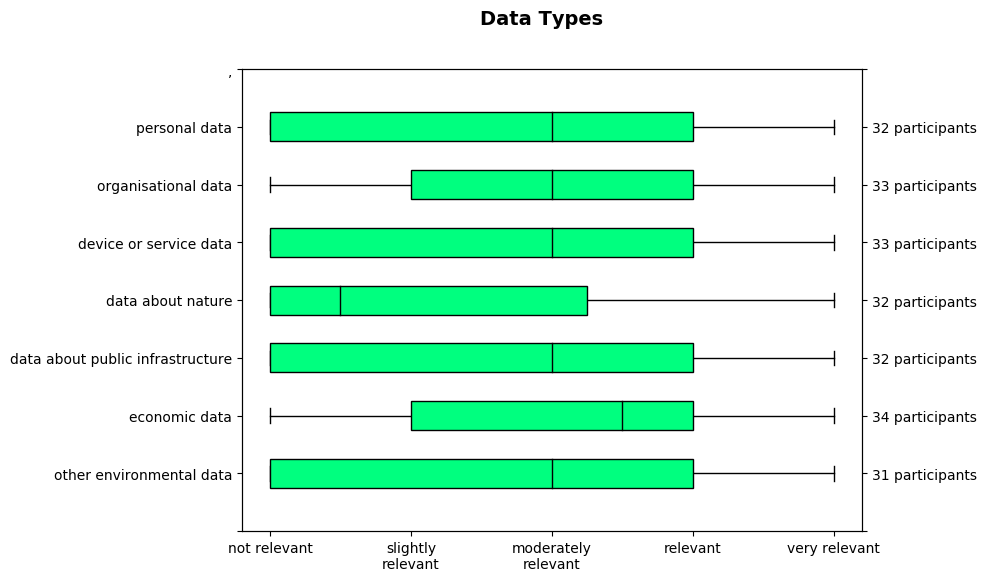

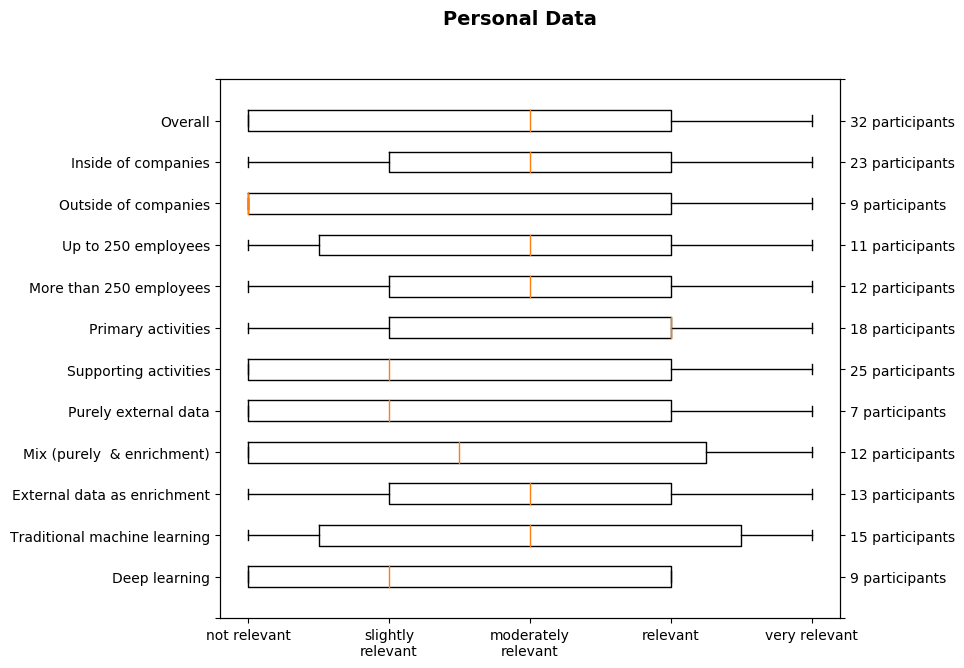

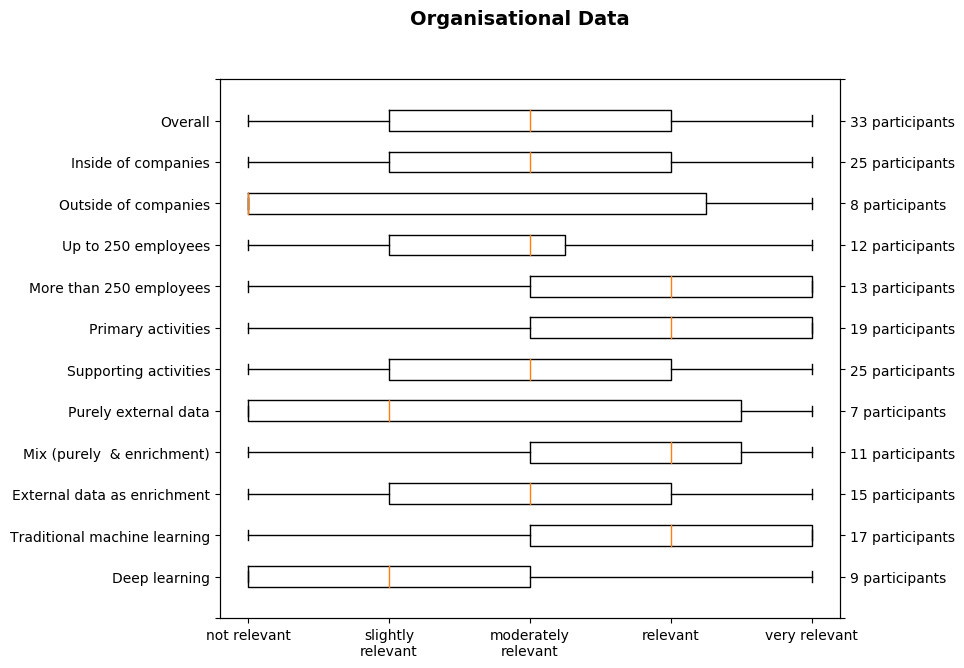

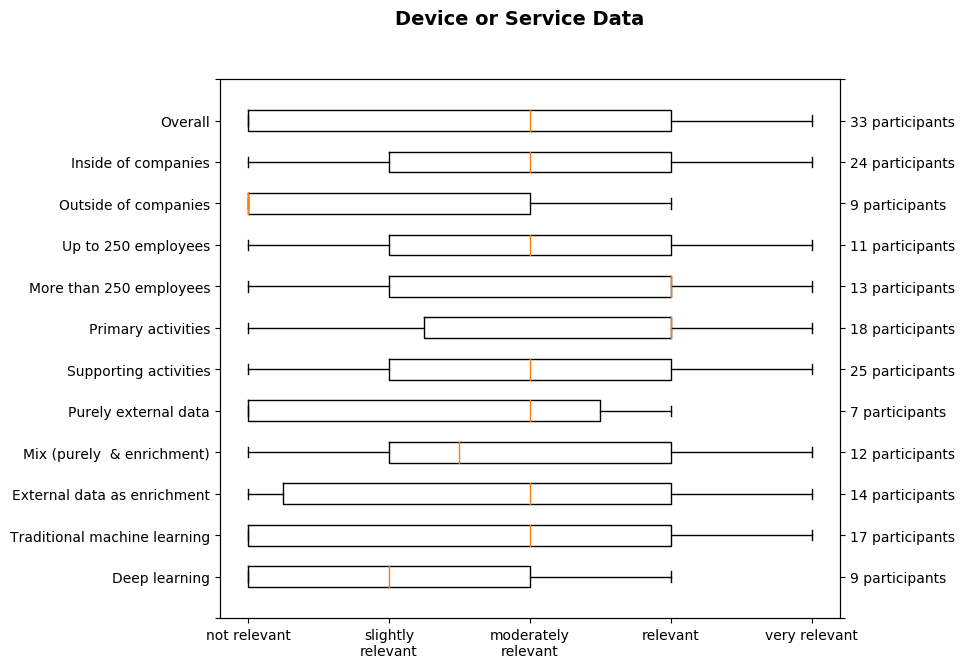

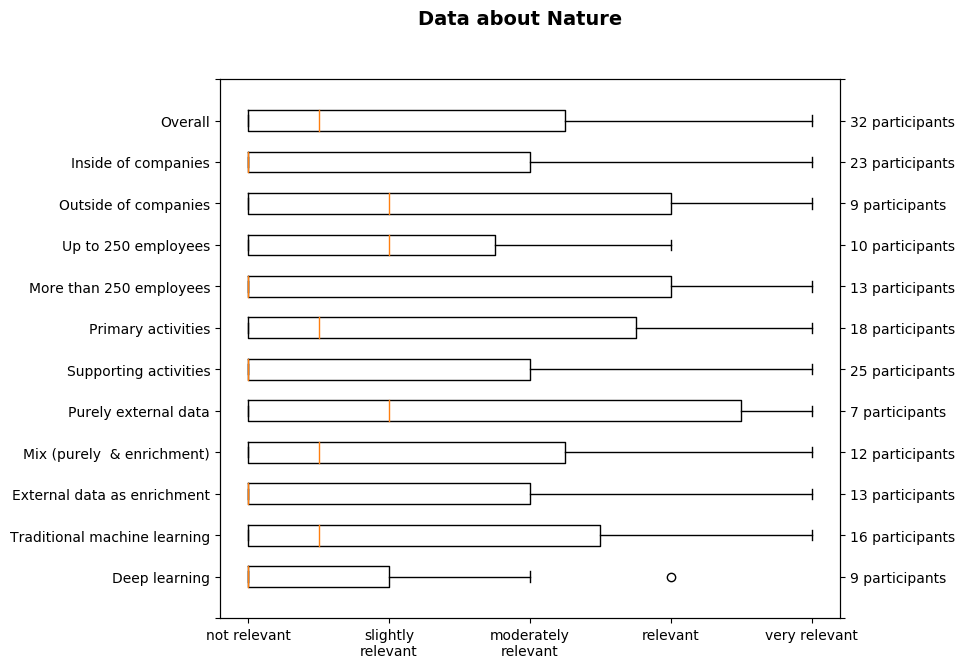

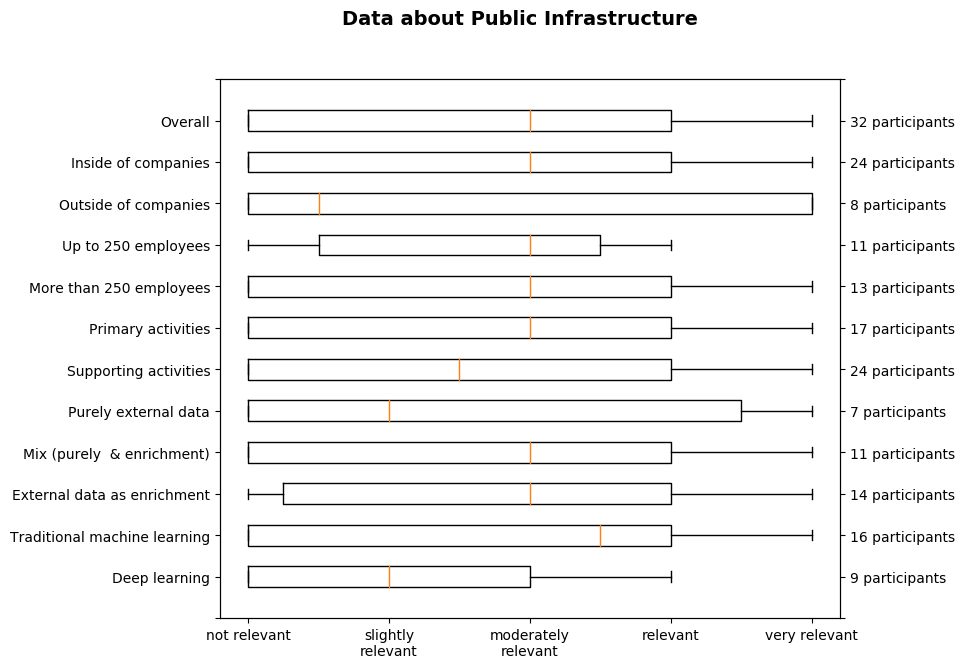

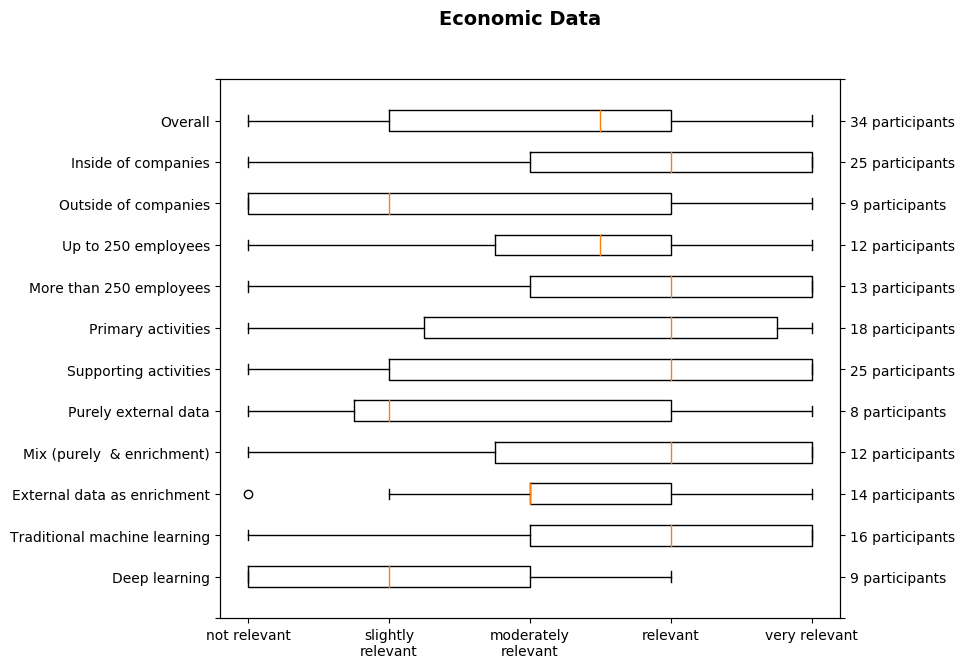

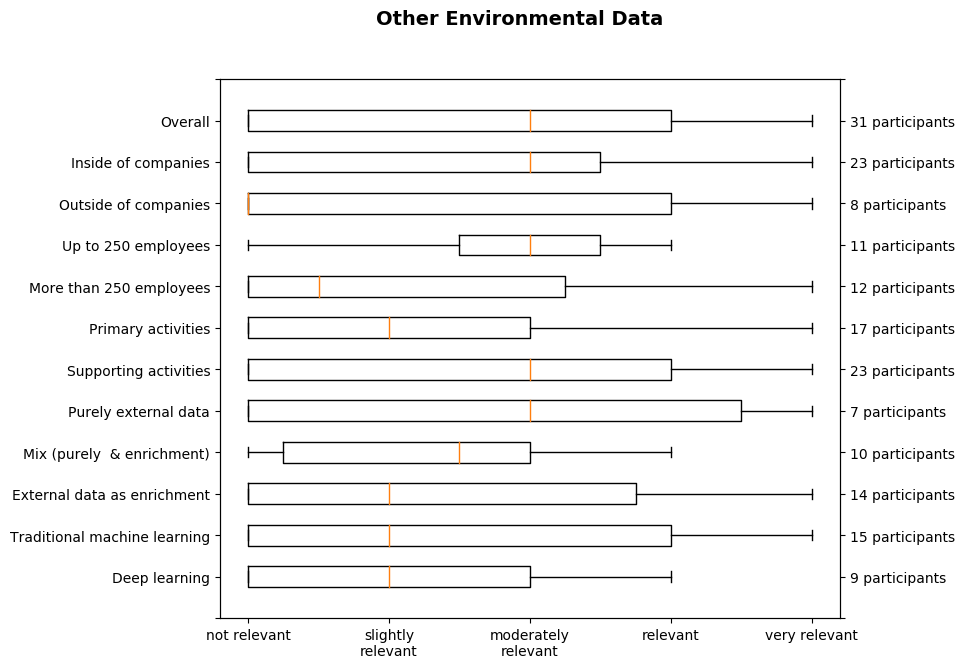

Other data types that were named by participants:
External financial data, location data, activity data
Text basedr
public data
news data
financial data
Stock Market Data, Weather Data, Wikipedia, Open Linked Data, Social Media Posts (Twitter, Facebook) etc, for Sentiment Analysis on Products, Services, Stocks, etc.
Physiological data
Client's information
All of which were rated either 'relevant' or 'very relevant'.


In [78]:
#Q23 - Data types
Q23=data.loc[:,"personal data (e.g., address, medical details, transactions, communications, etc.)":"Client's information"]
partQ23=len(Q23.dropna(axis=0,how="all").index)
data_types=Q23
print(partQ23, "participants have rated various data types -", len(data_types[filter_incompany].dropna(how="all").index), 
      "from inside and", len(data_types[filter_outcompany].dropna(how="all").index),
      "from outside of companies. Some even added new ones.")
#since "not applicable" translates to a zero, we need to clean the data here
data_types=data_types.replace(0,np.nan)
data_types=data.loc[:,"personal data (e.g., address, medical details, transactions, communications, etc.)":"other environmental data"]
data_types=data_types.drop(columns='environmental data (data about nature (e.g., trees in a forest), public infrastructure (e.g., streets in a city) or economic data)')
data_types.columns=["personal data","organisational data","device or service data","data about nature",
                    "data about public infrastructure","economic data","other environmental data"]
data_types.dropna(how="all")
data_types.replace(0, np.nan, inplace=True)

datatypelist=[data_types["personal data"].dropna(),data_types["organisational data"].dropna(),
              data_types["device or service data"].dropna(),data_types["data about nature"].dropna(),
              data_types["data about public infrastructure"].dropna(),data_types["economic data"].dropna(),
              data_types["other environmental data"].dropna()]

#visualize
answercounts=[""]
for i in datatypelist:
    answercounts.append(str(i.dropna().count()) + " participants")

ypos=np.arange(len(datatypelist)+2)

# figure related code
fig = plt.figure()
fig.suptitle("Data Types", fontsize=14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(8)
ax = fig.add_subplot(111)
ax.boxplot(datatypelist, vert=False,patch_artist=True, boxprops=dict(facecolor='springgreen', color="black"),
            medianprops=dict(color="black"))

ax.set_xticks([1,2,3,4,5])
ax.set_xticklabels(["not relevant","slightly\nrelevant","moderately\nrelevant","relevant","very relevant"])
ax.set_yticks(ypos)
ax.set_ybound(lower=ypos.min(), upper=ypos.max())
ax.set_yticklabels([",","personal data","organisational data","device or service data","data about nature","data about public infrastructure","economic data","other environmental data"])
ax.invert_yaxis()

axRight=ax.twinx()
axRight.set_yticks(ypos)
axRight.set_yticklabels(answercounts)
axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
axRight.invert_yaxis()

plt.show()

personal=data_types["personal data"].dropna()
organ=data_types["organisational data"].dropna()
device=data_types["device or service data"].dropna()
nature=data_types["data about nature"].dropna()
infra=data_types["data about public infrastructure"].dropna()
economic=data_types["economic data"].dropna()
other=data_types["other environmental data"].dropna()

def boxplotq10(columnlist, name):
    listoffilters=[columnlist, columnlist[filter_incompany], columnlist[filter_outcompany],
              columnlist[filter_small], columnlist[filter_large], columnlist[filter_primary]
              ,columnlist[filter_supporting], columnlist[filter_only], columnlist[filter_mix],
                   columnlist[filter_enrich],columnlist[filter_ML],columnlist[filter_DL] ]
    
    answercounts=[""]
    for i in listoffilters:
        answercounts.append(str(i.count()) + " participants")
        
    ypos=np.arange(len(listoffilters)+2)
    
    # Skipping a lot of other complexity her
    fig = plt.figure()
    fig.suptitle(name, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(listoffilters, vert=False)
    ax.set_xticks([1,2,3,4,5])
    ax.set_xticklabels(["not relevant","slightly\nrelevant","moderately\nrelevant","relevant","very relevant"])
    ax.set_yticks(ypos)
    ax.set_yticklabels(["","Overall","Inside of companies","Outside of companies","Up to 250 employees",
                        "More than 250 employees", "Primary activities", "Supporting activities",
                        "Purely external data", "Mix (purely  & enrichment)", "External data as enrichment",
                        "Traditional machine learning", "Deep learning"])
    ax.invert_yaxis()
    
    axRight=ax.twinx()
    axRight.set_yticks(ypos)
    axRight.set_yticklabels(answercounts)
    axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
    axRight.invert_yaxis()
    
    fig.set_figheight(7)
    fig.set_figwidth(8)

    return ax

boxplotq10(personal, "Personal Data")
boxplotq10(organ, "Organisational Data")
boxplotq10(device, "Device or Service Data")
boxplotq10(nature, "Data about Nature")
boxplotq10(infra, "Data about Public Infrastructure")
boxplotq10(economic, "Economic Data")
boxplotq10(other, "Other Environmental Data")

plt.show()
print("Other data types that were named by participants:")
for i in Q23.loc[:,'External financial data, location data, activity data':"Client's information"].drop(columns=["aaa","-","a","Other"]).columns:
    print(i)
print("All of which were rated either 'relevant' or 'very relevant'.")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


34 participants have rated three statements on external data in the context of ML - 24 inside and 10 outside of companies.


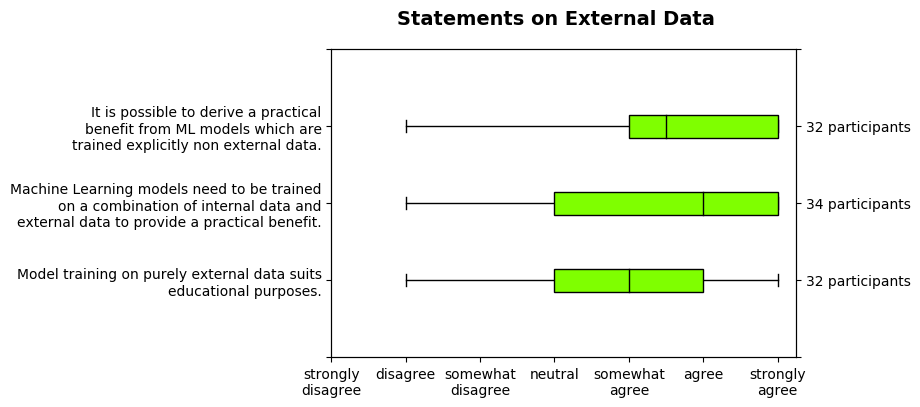

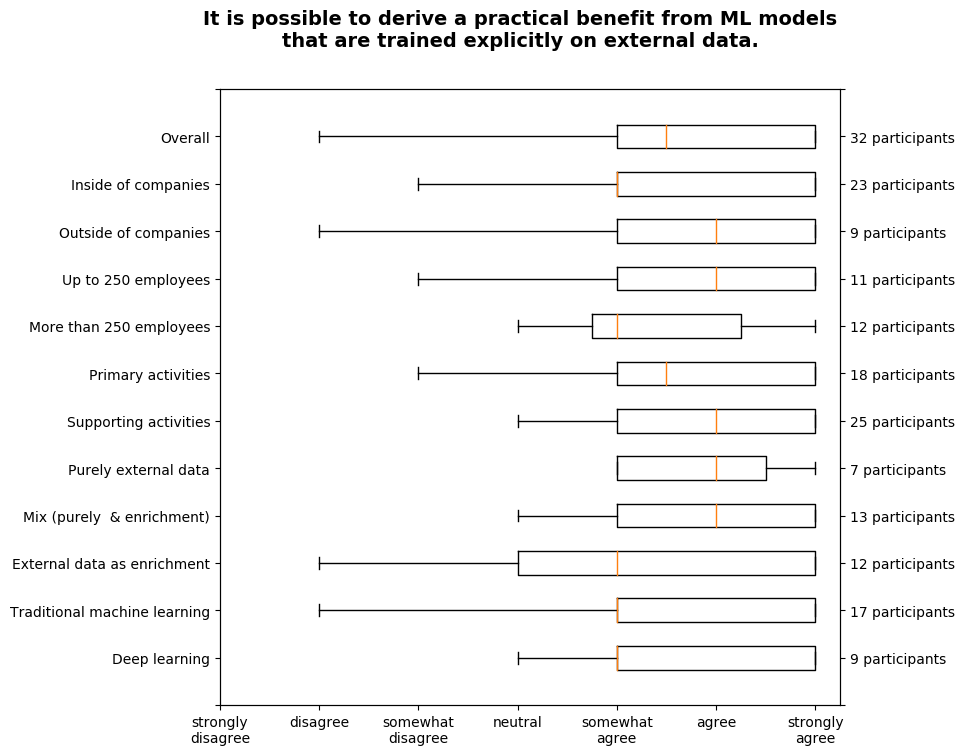

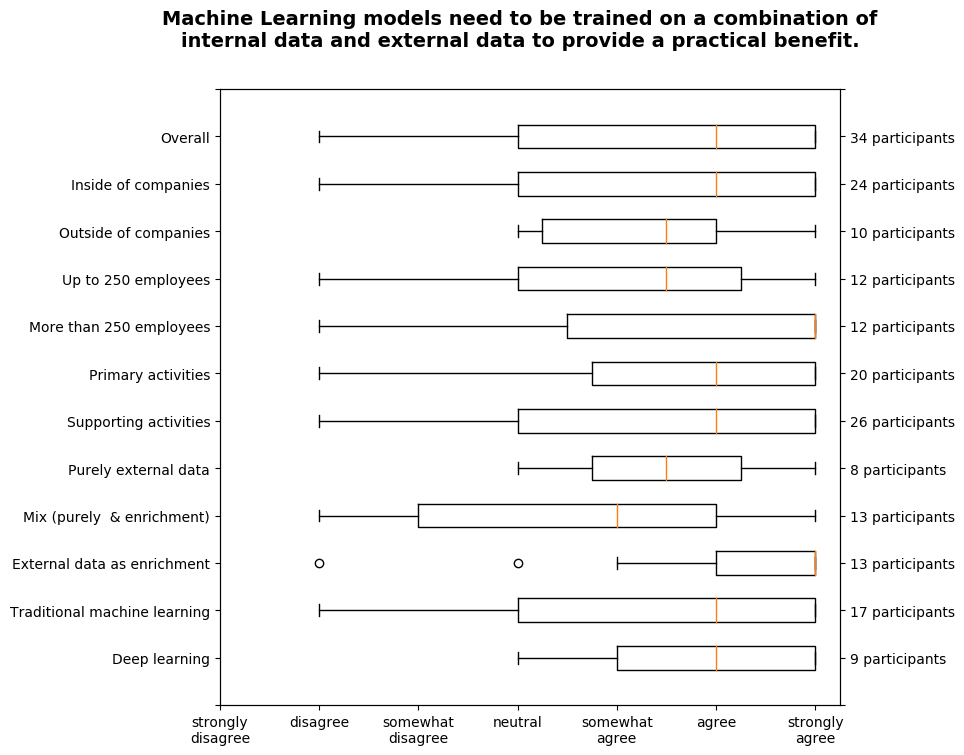

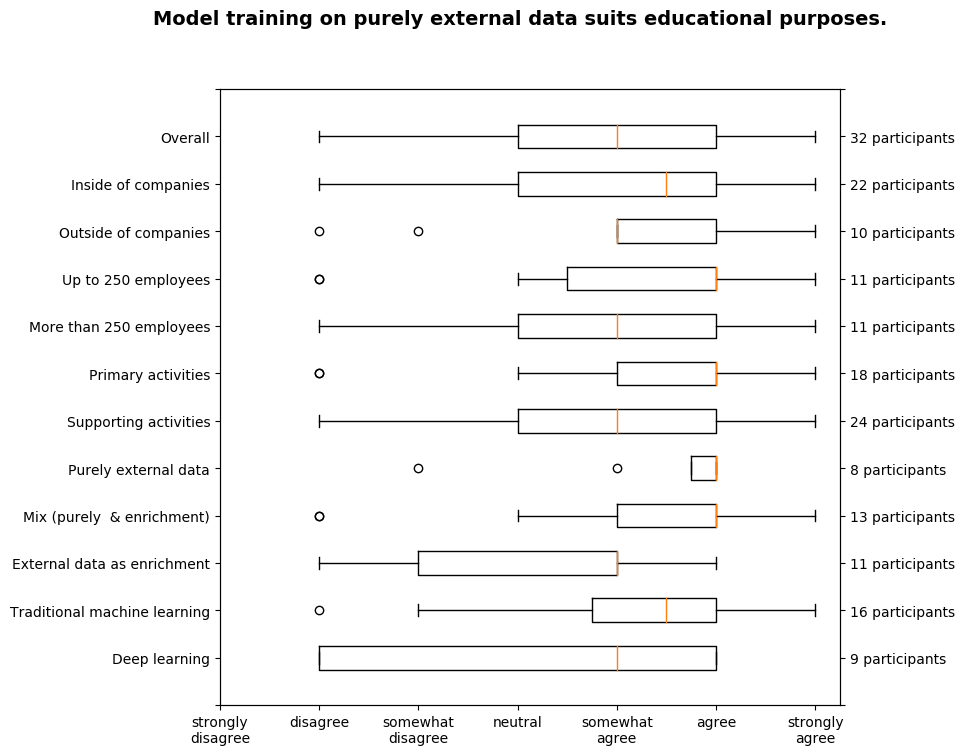

<Figure size 640x480 with 0 Axes>

In [81]:
#Q24 - Statements on external data
Q24=data.loc[:,"It is possible to derive a practical benefit from Machine Learning models which are trained explicitly on external data.":"Model training on purely external data suits educational purposes."]
#Question 24 - Statements on external data
partQ24=len(Q24.dropna(axis=0,how="all").index)
statements=Q24
print(partQ24, "participants have rated three statements on external data in the context of ML -",len(statements[filter_incompany].dropna(how="all").index),"inside and",len(statements[filter_outcompany].dropna(how="all").index),"outside of companies." )
#since "not applicable" translates to a zero, we need to clean the data here

statements.dropna(how="all")
statements.replace(0, np.nan, inplace=True)

statementlist=[]
for i in statements:
    statementlist.append(statements[i].dropna())

#visualize
answercounts=[""]
for i in statementlist:
    answercounts.append(str(i.count()) + " participants")

ypos=np.arange(len(statementlist)+2)

# figure related code
fig = plt.figure()
fig.suptitle("Statements on External Data", fontsize=14, fontweight='bold')
fig.set_figheight(4)
fig.set_figwidth(6)
ax = fig.add_subplot(111)

ax.boxplot(statementlist, vert=False,patch_artist=True, boxprops=dict(facecolor="chartreuse", color="black"),
            medianprops=dict(color="black"))

ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(["strongly\ndisagree","disagree","somewhat\ndisagree","neutral","somewhat\nagree","agree","strongly\nagree"])
ax.set_yticks(ypos)
ax.set_ybound(lower=ypos.min(), upper=ypos.max())
ax.set_yticklabels(["","It is possible to derive a practical\nbenefit from ML models which are\ntrained explicitly non external data.",
                       "Machine Learning models need to be trained\non a combination of internal data and\nexternal data to provide a practical benefit.",
                       "Model training on purely external data suits\neducational purposes."])
ax.invert_yaxis()

axRight=ax.twinx()
axRight.set_yticks(ypos)
axRight.set_yticklabels(answercounts)
axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
axRight.invert_yaxis()

plt.show()

statement1=statements["It is possible to derive a practical benefit from Machine Learning models which are trained explicitly on external data."].dropna()
statement2=statements["Machine Learning models need to be trained on a combination of internal data and external data to provide a practical benefit."].dropna()
statement3=statements["Model training on purely external data suits educational purposes."].dropna()

def boxplot(columnlist, name):
    listoffilters=[columnlist, columnlist[filter_incompany], columnlist[filter_outcompany],
              columnlist[filter_small], columnlist[filter_large], columnlist[filter_primary]
              ,columnlist[filter_supporting], columnlist[filter_only], columnlist[filter_mix],
                   columnlist[filter_enrich],columnlist[filter_ML],columnlist[filter_DL]]
    
    answercounts=[""]
    for i in listoffilters:
        answercounts.append(str(i.count()) + " participants")
        
    ypos=np.arange(len(listoffilters)+2)
    
    # Skipping a lot of other complexity her
    fig = plt.figure()
    fig.suptitle(name, fontsize=14, fontweight='bold')
    ax = fig.add_subplot(111)
    ax.boxplot(listoffilters, vert=False)
    ax.set_xticks([1,2,3,4,5,6,7])
    ax.set_xticklabels(["strongly\ndisagree","disagree","somewhat\ndisagree","neutral","somewhat\nagree","agree","strongly\nagree"])
    ax.set_yticks(ypos)
    ax.set_yticklabels(["","Overall","Inside of companies","Outside of companies","Up to 250 employees",
                        "More than 250 employees", "Primary activities", "Supporting activities",
                        "Purely external data", "Mix (purely  & enrichment)", "External data as enrichment",
                        "Traditional machine learning", "Deep learning"])
    ax.invert_yaxis()
    
    axRight=ax.twinx()
    axRight.set_yticks(ypos)
    axRight.set_yticklabels(answercounts)
    axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
    axRight.invert_yaxis()
    
    fig.set_figheight(8)
    fig.set_figwidth(8)

    return ax

boxplot(statement1, "It is possible to derive a practical benefit from ML models\nthat are trained explicitly on external data.")
boxplot(statement2,"Machine Learning models need to be trained on a combination of\ninternal data and external data to provide a practical benefit.")
boxplot(statement3,"Model training on purely external data suits educational purposes.")



plt.show()
plt.savefig('ext_statements.png')

30 participants have answered the question about which model complexity or mix of model compexity they apply - 22 inside and 8 outside of companies


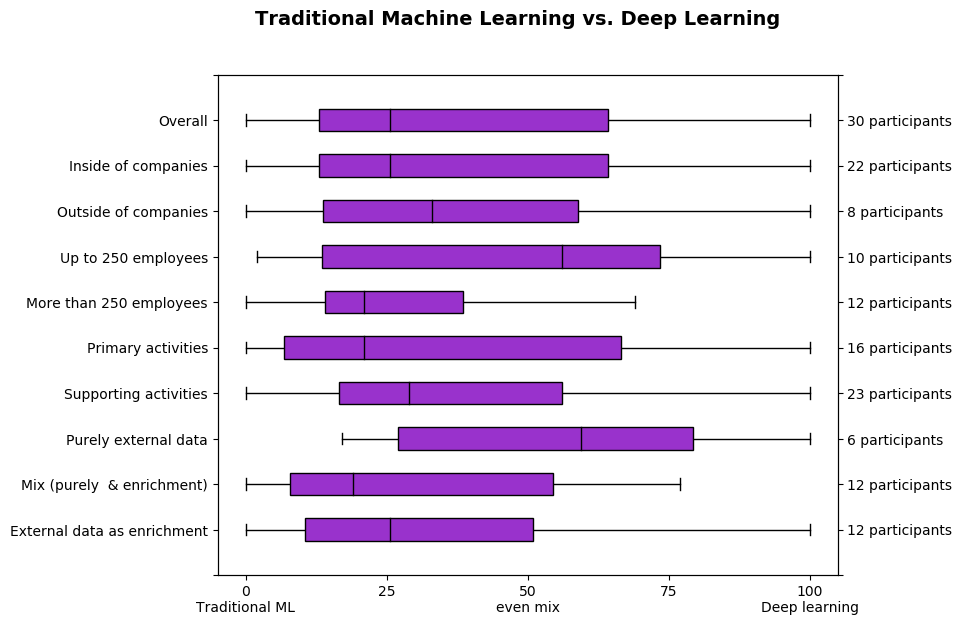

ja      33
nein     1
Name: 25. Do you know whether you are training models based on traditional Machine Learning or Deep Learning?, dtype: int64

In [82]:
#Q25&26 - Model complexity
#Q25 - Knowledge about model complexity
Q25=data["25. Do you know whether you are training models based on traditional Machine Learning or Deep Learning?"]
partQ25=Q25.value_counts().sum()

#Q26 - Model complexity
Q26=data["26. Which model complexity do you use most often?"]
partQ26=len(Q26.dropna(how="all").index)


overall_complexity=Q26.dropna()
complexity_df=[overall_complexity, overall_complexity[filter_incompany], overall_complexity[filter_outcompany],
              overall_complexity[filter_small], overall_complexity[filter_large], overall_complexity[filter_primary]
              , overall_complexity[filter_supporting], overall_complexity[filter_only], overall_complexity[filter_mix],
                   overall_complexity[filter_enrich]]

print(partQ26, "participants have answered the question about which model complexity or mix of model compexity they apply -",
      len(overall_complexity[filter_incompany].index), "inside and", len(overall_complexity[filter_outcompany].index),
      "outside of companies")

#visualize
answercounts=[""]
for i in complexity_df:
    answercounts.append(str(i.count()) + " participants")

ypos=np.arange(len(complexity_df)+2)

# figure related code
fig = plt.figure()
fig.suptitle("Traditional Machine Learning vs. Deep Learning", fontsize=14, fontweight='bold')
fig.set_figheight(6.5)
fig.set_figwidth(8)
ax = fig.add_subplot(111)
ax.boxplot(complexity_df, vert=False,patch_artist=True, boxprops=dict(facecolor="darkorchid", color="black"),
            medianprops=dict(color="black"))

ax.set_xticks([0,25,50,75,100])
ax.set_xticklabels(["0\nTraditional ML", 25,"50\neven mix", 75, "100\nDeep learning"])
ax.set_yticks(ypos)
ax.set_ybound(lower=ypos.min(), upper=ypos.max())
ax.set_yticklabels(["","Overall","Inside of companies","Outside of companies","Up to 250 employees",
                        "More than 250 employees", "Primary activities", "Supporting activities",
                        "Purely external data", "Mix (purely  & enrichment)", "External data as enrichment"])
ax.invert_yaxis()

axRight=ax.twinx()
axRight.set_yticks(ypos)
axRight.set_yticklabels(answercounts)
axRight.set_ybound(lower=ypos.min(), upper=ypos.max())
axRight.invert_yaxis()

plt.show()
Q25.value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


33 participants have answered the question about which frameworks they rely on to build ML models - 23 inside and 10 outside of companies.
One participant relies on own systems.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:88: UserWarning: Boolean Series key will be reindexed to match Da

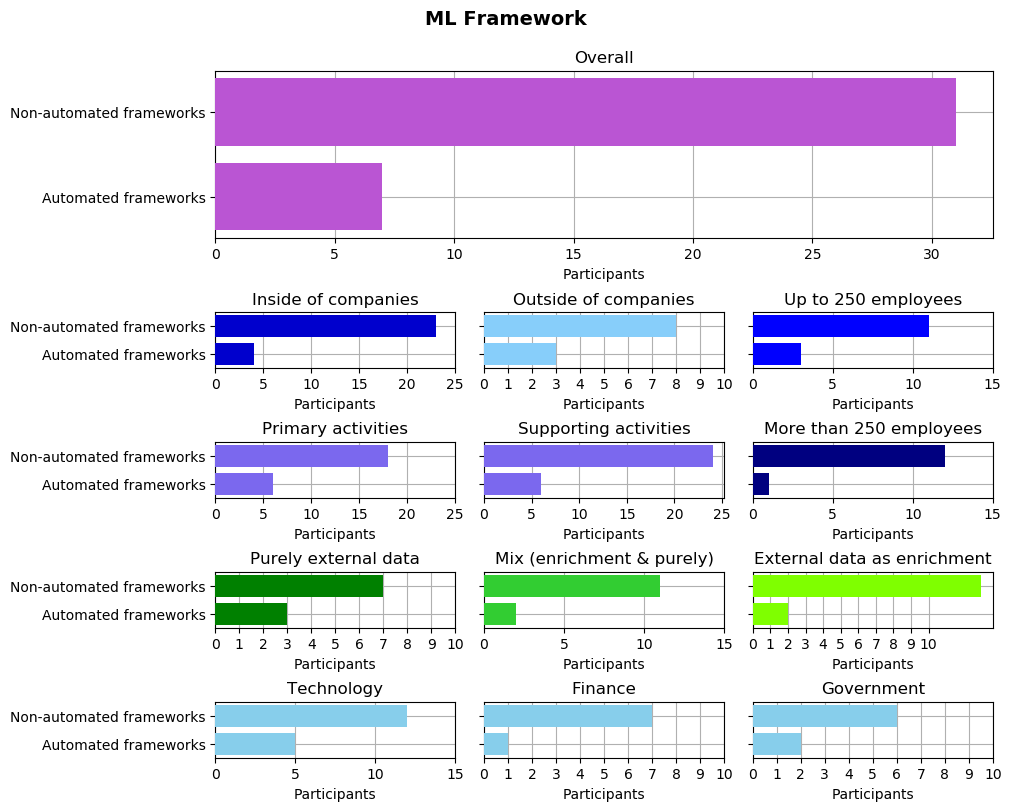

In [83]:
#Q27 - Model building process
Q27=data.loc[:,"Non-automated frameworks (e.g. scikit-learn, Keras or TensorFlow in Python)":"Textfeld.3"]
#Question 27 - ML framework
frameworkcount=Q27.dropna(axis=0,how="all")
partQ27=len(frameworkcount.index)

framework=data[["Automated frameworks (e.g. AutoSklearn, Autokeras)","Non-automated frameworks (e.g. scikit-learn, Keras or TensorFlow in Python)"]]

print(partQ27, "participants have answered the question about which frameworks they rely on to build ML models -",
      len(frameworkcount[filter_incompany].index), "inside and", len(frameworkcount[filter_outcompany].index),
      "outside of companies.")
print("One participant relies on own systems.")

fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(7, 3) 
fig.suptitle("ML Framework", fontsize=14, fontweight='bold')
labels=["Automated frameworks","Non-automated frameworks"]
ypos=np.arange(len(labels))

# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.barh(ypos, framework.sum(), zorder=3, color="mediumorchid")
big.grid(b=True, axis="both", zorder=0)
big.set(title='Overall',xlabel="Participants", xticks=[0,5,10,15,20,25,30], xticklabels=[0,5,10,15,20,25,30], yticks=np.arange(len(ypos)), yticklabels=labels)

small1=fig.add_subplot(gs[3,0])
small1.barh(np.arange(len(framework[filter_incompany].sum())), framework[filter_incompany].sum(), zorder=3, color="mediumblue")
small1.grid(b=True, axis="both", zorder=0)
small1.set(title='Inside of companies', yticks=np.arange(len(ypos)), yticklabels=labels,xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])

small2=fig.add_subplot(gs[3,1])
small2.barh(np.arange(len(framework[filter_outcompany].sum())), framework[filter_outcompany].sum(), zorder=3, color="lightskyblue")
small2.grid(b=True, axis="both", zorder=0)
small2.set(title='Outside of companies',yticks=np.arange(len(ypos)), yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])

small3=fig.add_subplot(gs[3,2])
small3.barh(np.arange(len(framework[filter_small].sum())), framework[filter_small].sum(), zorder=3, color="blue")
small3.grid(b=True, axis="both", zorder=0)
small3.set(title='Up to 250 employees',yticks=np.arange(len(ypos)), yticklabels=[],xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])

small4=fig.add_subplot(gs[4,0])
small4.barh(np.arange(len(framework[filter_primary].sum())), framework[filter_primary].sum(), zorder=3, color="mediumslateblue")
small4.grid(b=True, axis="both", zorder=0)
small4.set(title='Primary activities', yticks=np.arange(len(ypos)), yticklabels=labels,xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])

small5=fig.add_subplot(gs[4,1])
small5.barh(np.arange(len(framework[filter_supporting].sum())), framework[filter_supporting].sum(), zorder=3, color="mediumslateblue")
small5.grid(b=True, axis="both", zorder=0)
small5.set(title='Supporting activities',yticks=np.arange(len(ypos)), yticklabels=[],xlabel="Participants", xticks=[0,5,10,15,20,25], xticklabels=[0,5,10,15,20,25])

small6=fig.add_subplot(gs[4,2])
small6.barh(np.arange(len(framework[filter_large].sum())), framework[filter_large].sum(), zorder=3, color="navy")
small6.grid(b=True, axis="both", zorder=0)
small6.set(title='More than 250 employees',yticks=np.arange(len(ypos)), yticklabels=[],xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])

small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(ypos, framework[filter_only].sum(), align='center',color="green", zorder=3)
small7.set(yticks=ypos, yticklabels=labels,xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.grid(b=True, axis="both", zorder=0)

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(ypos,framework[filter_mix].sum(), align='center', color="limegreen", zorder=3)
small8.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small8.grid(b=True, axis="both", zorder=0)

small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(ypos,framework[filter_enrich].sum(), align='center', color="chartreuse",zorder=3)
small9.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)

small10=fig.add_subplot(gs[6,0])
small10.set_title('Technology')
small10.barh(ypos, framework[filter_tech].sum(), align='center',color="skyblue", zorder=3)
small10.set(yticks=ypos, yticklabels=labels,xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small10.grid(b=True, axis="both", zorder=0)

small11=fig.add_subplot(gs[6,1])
small11.set_title('Finance')
small11.barh(ypos,framework[filter_fin].sum(), align='center', color="skyblue", zorder=3)
small11.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small11.grid(b=True, axis="both", zorder=0)

small12=fig.add_subplot(gs[6,2])
small12.set_title('Government')
small12.barh(ypos,framework[filter_gov].sum(), align='center', color="skyblue",zorder=3)
small12.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small12.grid(b=True, axis="both", zorder=0)

fig.set_figheight(8)
fig.set_figwidth(10)

33 participants have answered the question about which learning technique they are mostly applying - 53 inside and 19 outside of companies.
One participant from outside of companies also indicated using semi-supervised learning most.


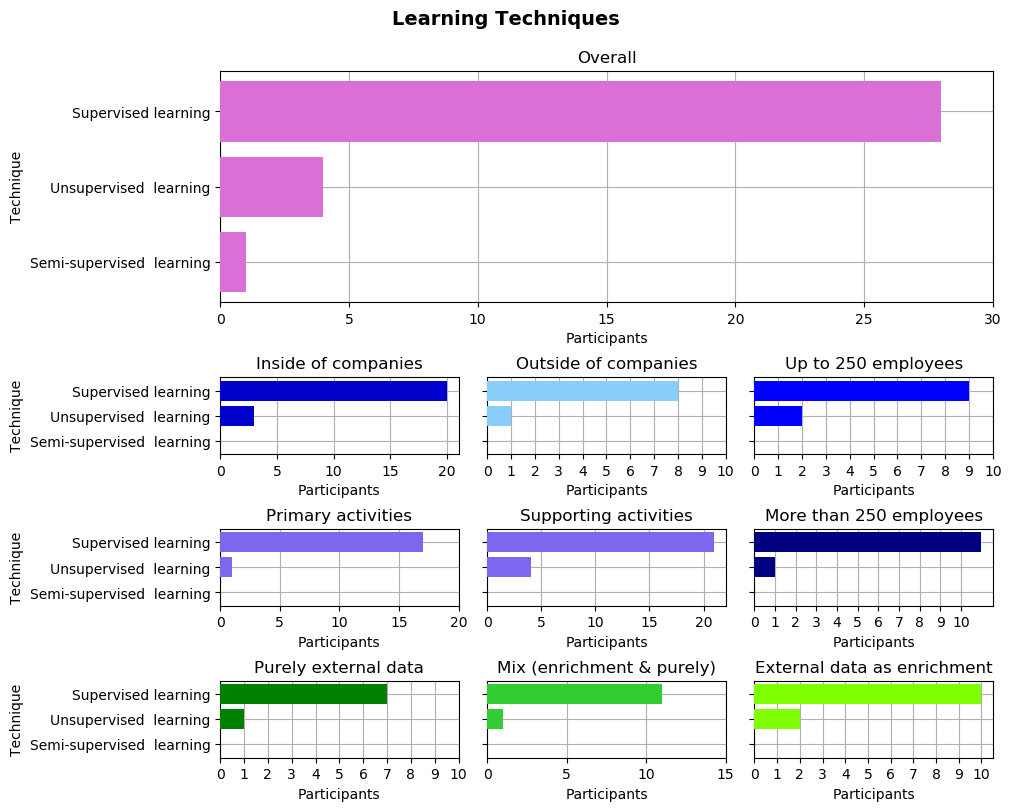

In [85]:
#Q28 - Learning methods
Q28=data["28. Which learning technique do you use most often?"]

partQ28=len(Q28.dropna().index)

print(partQ28, "participants have answered the question about which learning technique they are mostly applying -",
      len(Q28[filter_incompany].index), "inside and", len(Q28[filter_outcompany].index),
      "outside of companies.")
print("One participant from outside of companies also indicated using semi-supervised learning most.")

def fulllabel(filter):
    return [np.sum(Q28[filter]=="Supervised learning"),np.sum(Q28[filter]=="Unsupervised  learning"),np.sum(Q28[filter]=="Semi-supervised  learning ")]

fig = plt.figure(constrained_layout=True) 
gs = fig.add_gridspec(6, 3) 
fig.suptitle("Learning Techniques", fontsize=14, fontweight='bold')

labels = Q28.value_counts().index.tolist()
ypos = np.arange(len(labels))

# and columns 0 to 2 (again that is 0 and 1)
big = fig.add_subplot(gs[0:3,0:3]) 
big.barh(ypos, Q28.value_counts(), zorder=3, color="orchid")
big.grid(b=True, axis="both", zorder=0)
big.set(title='Overall', ylabel="Technique",xlabel="Participants", xticks=[0,5,10,15,20,25,30], xticklabels=[0,5,10,15,20,25,30], yticks=ypos, yticklabels=labels)
big.invert_yaxis() 

small1=fig.add_subplot(gs[3,0])
small1.barh(ypos, fulllabel(filter_incompany), zorder=3, color="mediumblue")
small1.grid(b=True, axis="both", zorder=0)
small1.set(title='Inside of companies', ylabel="Technique",yticks=ypos, yticklabels=labels,xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small1.invert_yaxis()

small2=fig.add_subplot(gs[3,1])
small2.barh(ypos, fulllabel(filter_outcompany), zorder=3, color="lightskyblue")
small2.grid(b=True, axis="both", zorder=0)
small2.set(title='Outside of companies',yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small2.invert_yaxis()

small3=fig.add_subplot(gs[3,2])
small3.barh(ypos, fulllabel(filter_small), zorder=3, color="blue")
small3.grid(b=True, axis="both", zorder=0)
small3.set(title='Up to 250 employees',yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small3.invert_yaxis()

small4=fig.add_subplot(gs[4,0])
small4.barh(ypos, fulllabel(filter_primary), zorder=3, color="mediumslateblue")
small4.grid(b=True, axis="both", zorder=0)
small4.set(title='Primary activities',ylabel="Technique", yticks=ypos, yticklabels=labels,xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small4.invert_yaxis()

small5=fig.add_subplot(gs[4,1])
small5.barh(ypos, fulllabel(filter_supporting), zorder=3, color="mediumslateblue")
small5.grid(b=True, axis="both", zorder=0)
small5.set(title='Supporting activities',yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,5,10,15,20], xticklabels=[0,5,10,15,20])
small5.invert_yaxis()

small6=fig.add_subplot(gs[4,2])
small6.barh(ypos, fulllabel(filter_large), zorder=3, color="navy")
small6.grid(b=True, axis="both", zorder=0)
small6.set(title='More than 250 employees',yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small6.invert_yaxis()

small7=fig.add_subplot(gs[5,0])
small7.set_title('Purely external data')
small7.barh(ypos, fulllabel(filter_only), align='center',color="green", zorder=3)
small7.set(yticks=ypos, yticklabels=labels,ylabel="Technique",xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small7.grid(b=True, axis="both", zorder=0)
small7.invert_yaxis()

small8=fig.add_subplot(gs[5,1])
small8.set_title('Mix (enrichment & purely)')
small8.barh(ypos, fulllabel(filter_mix), align='center', color="limegreen", zorder=3)
small8.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,5,10,15], xticklabels=[0,5,10,15])
small8.grid(b=True, axis="both", zorder=0)
small8.invert_yaxis()

small9=fig.add_subplot(gs[5,2])
small9.set_title('External data as enrichment')
small9.barh(ypos, fulllabel(filter_enrich), align='center', color="chartreuse",zorder=3)
small9.set(yticks=ypos, yticklabels=[],xlabel="Participants", xticks=[0,1,2,3,4,5,6,7,8,9,10], xticklabels=[0,1,2,3,4,5,6,7,8,9,10])
small9.grid(b=True, axis="both", zorder=0)
small9.invert_yaxis()

fig.set_figheight(8)
fig.set_figwidth(10)
fig.savefig('Q28nique.png')

In [86]:
#Q29 - external data sources
#Q29 - External data sources
Q29=data["29. Which external sources for data are you currently using to train Machine Learning models?"]
#create an overview of all datapools by target group, external data usage, country, industry, value chain application area and company size 

Q29answers=Q29.dropna()
for i in Q29answers:
    print(i)
    
#select those values that should be dropped as they do not show any data pool
vals_to_drop=[",","-", "()"]
inds_to_drop=data[Q29.isin(vals_to_drop)].index.tolist()
realanswers=Q29answers.drop(inds_to_drop)
partQ29=len(realanswers.index)
#consolidate value chain and industries in one column each
data['Industry'] = Q5and10.eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1)
data['ValueChain']= Q6and12.eq(1).apply(lambda x: ', '.join(x[x].index), axis = 1)
#create DF with only the relevant columns and rows
Datapooloverview=data[["1. Are you using external data sources for the training of Machine Learning models?","Country","Industry","ValueChain","8. How many people are employed at the company you are working at?", "29. Which external sources for data are you currently using to train Machine Learning models?"]]
Datapooloverview.loc[realanswers.index]

Dan Ofer's SB open datasets(https://docs.google.com/spreadsheets/d/1Nq8VAoZZo1yABAi4E9zR3Z6gcE2GW1s6c2ECjuyUAyc/edit?usp=sharing), SparkBeyond World Datasets (http://sparkbeyond.com/), kaggle datasets (https://www.kaggle.com/datasets), CENSUS (https://www.census.gov/), USA ACS census (https://www.census.gov/), data.world (https://data.world/)
NIST: National Institute of Standards and Technology (https://www.nist.gov/), Elsevier (https://www.elsevier.com/en-gb), GitHub (https://github.com/), Materials Project (https://materialsproject.org/) and other articles/research journals and also information in research group's websites.
Phish tank
Kaggle
Meteomatics, Crime statistics, Unable to tell you about others
,
Yahoo finance () &amp; other finance data
Experian ConsumerView (https://www.experian.com/marketing-services/targeting/data-driven-marketing/consumer-view-data)
Credit bureaus, specialised Data providers
news-data, social media data, central bank communication data, financial data,


,1. Are you using external data sources for the training of Machine Learning models?,Country,Industry,ValueChain,8. How many people are employed at the company you are working at?,29. Which external sources for data are you currently using to train Machine Learning models?
2,"Yes, sometimes as enrichment and sometimes as ...",Israel,Computer Software,"Inbound logistics, Outbound logistics, Marketi...",between 50 and 250,Dan Ofer's SB open datasets(https://docs.googl...
4,"Yes, as enrichment of our internal data",_Other,"Chemicals, Oil &amp; Energy, Research",R&D,NaN,NIST: National Institute of Standards and Tech...
6,"Yes, as stand-alone training data",Saudi Arabia,Computer &amp; Network Security,"Service.1, Company infrastructure",NaN,Phish tank
37,"Yes, as stand-alone training data",Malaysia,Computer Software,R&D,NaN,Kaggle
41,"Yes, as enrichment of our internal data",United Kingdom,Insurance,Service.1,between 50 and 250,"Meteomatics, Crime statistics, Unable to tell ..."
56,"Yes, sometimes as enrichment and sometimes as ...",United Kingdom,"Banking, Computer Software, Investment Banking",Finances & controlling,NaN,Yahoo finance () &amp; other finance data
58,"Yes, as enrichment of our internal data",United States,Telecommunications,"Inbound logistics, Production, Outbound logist...",more than 1000,Experian ConsumerView (https://www.experian.co...
60,"Yes, as enrichment of our internal data",Germany,Financial Services,"Production, R&D",more than 1000,"Credit bureaus, specialised Data providers"
65,"Yes, sometimes as enrichment and sometimes as ...",United Kingdom,Research,R&D,between 50 and 250,"news-data, social media data, central bank com..."
68,"Yes, as enrichment of our internal data",India,Insurance,"Inbound logistics, Production, Outbound logist...",more than 1000,data from office open data portals of goverments


In [87]:
#Q30 - Dummy question
Q30=data["30. This is the last question before the end of the questionnaire. Are you sure you are done and want to submit the survey?"]
partQ30=Q30.value_counts().sum()
Q30.value_counts()

ja      29
nein     1
Name: 30. This is the last question before the end of the questionnaire. Are you sure you are done and want to submit the survey?, dtype: int64

In [88]:
topics= ["Extent of external data usage","Development inside of a company (PIC)","Development outside of a company (POC)",
        "Applicability for companies in specific industry context","Industry affiliation (POC)",
        "Value chain application area (POC)","Country (POC)","Company size","Country (PIC)","Industry affiliation (PIC)",
        "Job title","Value chain application area (PIC)","Data selection criteria I","Data selection criteria II",
        "Data selection criteria alternative","Data structure","Data structure estimation","File formats",
        "Preferred formats","Undesired formats","Data providers","Data source exclusivity","Data type relevancy",
        "External data statements","Model complexity","Model complexity estimation","Model building process",
        "Learning technique","External data sources","Dummy question for outro"]
questions=[]
for i in range(1, 31):
    questions.append(f'Q{i}')
participation=[partQ1,partQ2,partQ3,partQ4,partQ5,partQ6,partQ7,partQ8,partQ9,partQ10,partQ11,partQ12,partQ13,partQ14,
               partQ15,partQ16,partQ17,partQ18,partQ19,partQ20,partQ21,partQ22,partQ23,partQ24,partQ25,partQ26,partQ27,
               partQ28,partQ29,partQ30]

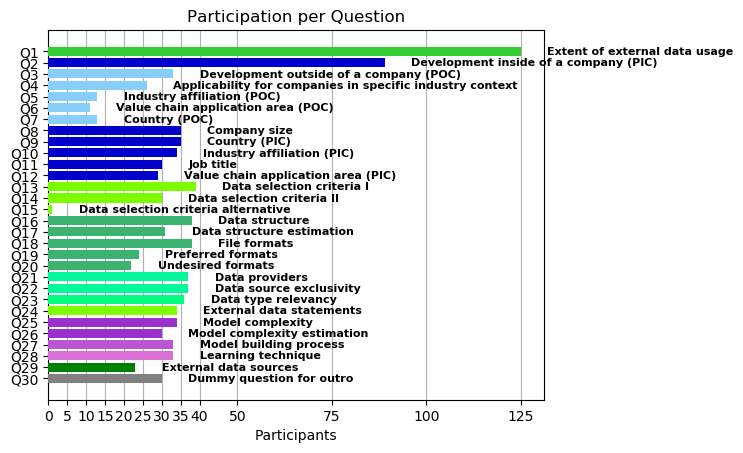

In [89]:
participation_df = pd.DataFrame(list(zip(questions, topics, participation)), 
               columns =["Question","Topic","Participation"]) 
fig, ax = plt.subplots()    
width = 2 # the width of the bars 
ind = np.arange(len(participation_df.index))  # the x locations for the groups
ax.barh(ind, participation_df["Participation"], tick_label=participation_df["Question"],color=['limegreen',
'mediumblue','lightskyblue','lightskyblue','lightskyblue','lightskyblue','lightskyblue',
'mediumblue','mediumblue','mediumblue','mediumblue','mediumblue','lawngreen','lawngreen','lawngreen',
'mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumseagreen','mediumspringgreen',
'mediumspringgreen','springgreen','chartreuse','darkorchid',
'darkorchid','mediumorchid','orchid','green','grey'], zorder=3)
plt.title('Participation per Question')
plt.xlabel('Participants')
ax.grid(b=True, axis="x", zorder=0)
for i, v in enumerate(participation_df.Topic):
    ax.text(participation_df.loc[i,"Participation"]+7, i+0.3, v, fontsize=8, fontweight="bold")
ax.set(xticks=[0,5,10,15,20,25,30,35,40, 50,75,100,125], xticklabels=[0,5,10,15,20,25,30,35,40, 50,75,100,125])
ax.invert_yaxis()
plt.show()